# <font color='darkorange'> AN EDUCATIONAL REVOLUTION
    
#### Students: 
   
- Afonso Cadete | 20211519
- Bruna Faria | 20211529
- Catarina Oliveira | 20211616   
- Joana Rosa | 20211516
- Martim Serra | 20211543
    
    
### Table of Contents <a class="anchor" id='toc'></a> 
- [Data Exploration](#1)
    - [Duplicates](#1.1)
    - [Missing Values & Data Types](#1.2)
    - [Inconsistencies](#P1.3)
    - [Distributions & Outliers](#1.4)
    - [Correlations](#1.5)
- [Feature Engineering](#2) 
    - [Data Cleaning & Normalization](#2.1)
    - [Feature Creation](#2.2)
    - [Binarization](#2.3)
    - [Reclassifying](#2.4)
    - [Visualizations](#2.5)
- [Data Preparation](#3)
    - [One-Hot Encoding](#3.1)
- [Export](#4)

#### Importing the necessary libraries

In [2]:
### Excel
# !pip install openpyxl

### Basic libraries
# !pip install pandas
import pandas as pd
# !pip install numpy
import numpy as np

### Web scraping
# !pip install requests
import requests
# !pip install bs4
from bs4 import BeautifulSoup

### Visualizations
# !pip install matplotlib
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12, 7

# ### Scikit
# !pip install scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

### Translator
# !pip install googletrans
# from googletrans import Translator

### Tools
import time
from itertools import combinations
import json

### Warnings
import warnings
warnings.filterwarnings('ignore')

### Functions
from utils1 import (
    plot_bar_chart,
    plot_histogram,
    plot_box,
    plot_scatter,
    plot_kde,
    plot_correlation_matrix,
    web_scraping_dges_areas,
    # dictionary_translator,
    dictionary_capitalizer,
    transform_variables_to_boolean,
    datatype_distinction,
    data_transform,
    drop_missing_values,
    one_hot_encoding,
    calculate_mean_difference,
    get_years_of_education
)

### Path
# data_path = 'data\\'
temp_path = 'temp\\'

### Autoreload
%load_ext autoreload
%autoreload 2

#### Importing the data

In [3]:
# Import data
descriptive_data = pd.read_excel('Descriptive_Data.xlsx', index_col=0)

In [4]:
# Copy of the datasets
data = descriptive_data.copy()

# <font color='darkorange'> Data Exploration <a class="anchor" id="1"></a>
  [Back to TOC](#toc)

In [5]:
# Visualize the dataset
data

,Marital status,Application mode,Application order,Course,Morning shift participation,Previous qualification,Previous qualification score,Nationality,Mother's qualification,Father's qualification,...,N unscored units 1st period,N units credited 2nd period,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Registered,Observations
Userid,,,,,,,,,,,,,,,,,,,,,
699,single,0.0,1.0,Agronomy,1.0,12th grade - Technological specialization course,140.0,Portuguese,12th grade,6th grade,...,0.0,0.0,6.0,11.0,6.0,11.714286,0.0,70.0,Yes,NaN
456,married,0.0,1.0,Social Service (evening attendance),0.0,12th grade,130.0,Portuguese,NaN,NaN,...,0.0,1.0,6.0,15.0,2.0,11.000000,1.0,55.0,Yes,NaN
647,single,1.0,1.0,Social Service,1.0,12th grade,135.0,Portuguese,4th grade,12th grade,...,0.0,0.0,6.0,15.0,1.0,10.000000,0.0,67.0,Yes,NaN
383,single,1.0,1.0,Social Service,1.0,12th grade,135.0,Portuguese,6th grade,6th grade,...,0.0,0.0,6.0,12.0,3.0,10.333333,0.0,93.0,Yes,NaN
1217,single,2.0,4.0,Social Service,1.0,12th grade,124.0,Portuguese,9th grade,9th grade,...,0.0,0.0,6.0,11.0,NaN,12.000000,0.0,43.0,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,single,0.0,1.0,Oral Hygiene,1.0,12th grade,130.0,Portuguese,9th grade,6th grade,...,0.0,0.0,8.0,14.0,7.0,12.150000,0.0,44.0,Yes,NaN
2761,single,0.0,1.0,Nursing,1.0,Master degree,150.0,Portuguese,Bachelor degree,6th grade,...,0.0,2.0,8.0,10.0,NaN,13.306250,0.0,76.0,Yes,NaN
4410,married,0.0,1.0,Management (evening attendance),0.0,12th grade,140.0,Portuguese,4th grade,4th grade,...,0.0,0.0,5.0,6.0,5.0,14.333333,0.0,34.0,Yes,NaN


## Duplicates <a class="anchor" id="1.1"></a>

In [6]:
data[data.duplicated()] #1647

,Marital status,Application mode,Application order,Course,Morning shift participation,Previous qualification,Previous qualification score,Nationality,Mother's qualification,Father's qualification,...,N unscored units 1st period,N units credited 2nd period,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Registered,Observations
Userid,,,,,,,,,,,,,,,,,,,,,
4099,single,2.0,2.0,Oral Hygiene,1.0,12th grade,120.0,Portuguese,4th grade,4th grade,...,0.0,0.0,8.0,8.0,0.0,0.000000,0.0,91.0,Yes,NaN
2357,single,1.0,1.0,Animation and Multimedia Design,1.0,12th grade,138.0,Portuguese,12th grade,12th grade,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,79.0,Yes,NaN
2418,single,0.0,1.0,Management (evening attendance),NaN,12th grade,140.0,Portuguese,4th grade,4th grade,...,0.0,13.0,14.0,14.0,14.0,11.357143,0.0,62.0,Yes,NaN
3371,single,0.0,1.0,Management,1.0,Bachelor degree,130.0,Portuguese,4th grade,4th grade,...,0.0,0.0,5.0,0.0,0.0,0.000000,0.0,28.0,Yes,NaN
2112,single,2.0,1.0,Agronomy,1.0,12th grade,131.0,Portuguese,9th grade,12th grade,...,0.0,0.0,6.0,8.0,6.0,14.333333,0.0,46.0,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.drop_duplicates(inplace=True)

## Missing Values & Data Types <a class="anchor" id="1.2"></a>

In [8]:
# Get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4425 entries, 699 to 1292
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marital status                4424 non-null   object 
 1   Application mode              4336 non-null   float64
 2   Application order             4336 non-null   float64
 3   Course                        4424 non-null   object 
 4   Morning shift participation   4336 non-null   float64
 5   Previous qualification        4422 non-null   object 
 6   Previous qualification score  4424 non-null   float64
 7   Nationality                   4424 non-null   object 
 8   Mother's qualification        4294 non-null   object 
 9   Father's qualification        4308 non-null   object 
 10  Mother's occupation           4407 non-null   object 
 11  Father's occupation           4371 non-null   object 
 12  Entry score                   4424 non-null   float64
 13  Displa

### Missing Values

In [9]:
# Drop objects with more than 50% of missing data
data = drop_missing_values(1, data)[0] #rows
print('\n')
data = drop_missing_values(0, data)[0] #columns

REMOVE
73223: 100.0%
Total: 1


REMOVE
Observations: 100.0%
Total: 1


### Data Types

In [10]:
# Turn two-value variables to boolean
data = transform_variables_to_boolean(data)[0]

## Inconsistencies <a class="anchor" id="1.3"></a>

### `Course` vs. `Morning shift participation` 

In [11]:
evening_courses = data['Course'].str.contains('evening')
morning_participations = (data['Morning shift participation'] == True)

In [12]:
# Observations that have "evening attendance" in 'Course' 
# but "Morning shift participation" is True
data[evening_courses & morning_participations] #16

,Marital status,Application mode,Application order,Course,Morning shift participation,Previous qualification,Previous qualification score,Nationality,Mother's qualification,Father's qualification,...,Average grade 1st period,N unscored units 1st period,N units credited 2nd period,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Registered
Userid,,,,,,,,,,,,,,,,,,,,,
711,married,0.0,1.0,Management (evening attendance),True,9th grade,133.1,Portuguese,6th grade,6th grade,...,0.000000,0.0,0.0,5.0,5.0,NaN,0.000000,0.0,54.0,Yes
2427,single,0.0,2.0,Management (evening attendance),True,12th grade,133.1,Portuguese,9th grade,6th grade,...,0.000000,0.0,0.0,5.0,5.0,0.0,0.000000,0.0,91.0,Yes
2958,married,0.0,1.0,Social Service (evening attendance),True,Bachelor degree,110.0,Portuguese,4th grade,4th grade,...,12.636364,0.0,5.0,8.0,8.0,8.0,11.000000,0.0,38.0,Yes
3405,married,0.0,1.0,Management (evening attendance),True,12th grade,134.0,Portuguese,4th grade,4th grade,...,10.200000,0.0,0.0,5.0,9.0,4.0,11.250000,0.0,98.0,Yes
4084,single,0.0,1.0,Management (evening attendance),True,Bachelor degree,130.0,Portuguese,Bachelor degree,9th grade,...,13.714286,0.0,0.0,5.0,7.0,5.0,13.142857,0.0,94.0,Yes
2753,married,0.0,1.0,Social Service (evening attendance),True,9th grade,133.1,Portuguese,9th grade,4th grade,...,0.000000,0.0,0.0,5.0,6.0,0.0,0.000000,0.0,77.0,Yes
2418,single,0.0,1.0,Management (evening attendance),True,12th grade,140.0,Portuguese,4th grade,4th grade,...,10.800000,0.0,13.0,14.0,14.0,14.0,11.357143,0.0,62.0,Yes
3683,single,0.0,1.0,Management (evening attendance),True,12th grade,110.0,Portuguese,4th grade,4th grade,...,0.000000,0.0,0.0,5.0,5.0,0.0,0.000000,0.0,98.0,Yes
706,facto union,0.0,1.0,Management (evening attendance),True,12th grade,120.0,Portuguese,4th grade,4th grade,...,13.000000,0.0,0.0,5.0,11.0,4.0,13.333333,2.0,34.0,Yes


In [13]:
# Make previous observations as NaN
data.loc[evening_courses & morning_participations, 'Morning shift participation'] = np.nan

### `N`

In [14]:
data1 = data.copy().iloc[:, 21:27]
data2 = data.copy().iloc[:, 27:33]

In [15]:
display(data1.describe().T)
display(data2.describe().T)

,count,mean,std,min,25%,50%,75%,max
N units credited 1st period,4336.0,0.711255,2.367723,0.0,0.0,0.000000,0.0,20.000
N units taken 1st period,4336.0,6.264991,2.477978,0.0,5.0,6.000000,7.0,26.000
N scored units 1st period,4336.0,8.297048,4.181946,0.0,6.0,8.000000,10.0,45.000
N units approved 1st period,4336.0,4.711716,3.101945,0.0,3.0,5.000000,6.0,26.000
Average grade 1st period,4424.0,10.640822,4.843663,0.0,11.0,12.285714,13.4,18.875
N unscored units 1st period,4336.0,0.139530,0.697100,0.0,0.0,0.000000,0.0,12.000


,count,mean,std,min,25%,50%,75%,max
N units credited 2nd period,4336.0,0.547279,1.931605,0.0,0.00,0.0,0.000000,19.000000
N units taken 2nd period,4336.0,6.226937,2.197235,0.0,5.00,6.0,7.000000,23.000000
N scored units 2nd period,4336.0,8.060655,3.942173,0.0,6.00,8.0,10.000000,33.000000
N units approved 2nd period,4336.0,4.431734,2.996183,0.0,2.00,5.0,6.000000,20.000000
Average grade 2nd period,4424.0,10.230206,5.210808,0.0,10.75,12.2,13.333333,18.571429
N unscored units 2nd period,4336.0,0.150600,0.753410,0.0,0.00,0.0,0.000000,12.000000


In [16]:
# # If taken = 0 => * = 0
# print(data1[data1['N units taken 1st period'] == 0].sum(axis=0)) #0
# print('\n')
# print(data2[data2['N units taken 2nd period'] == 0].sum(axis=0)) #0

In [17]:
# # A student has to have more units taken than credited
# display(data1[data1['N units taken 1st period'] < data1['N units credited 1st period']]) #0
# display(data2[data2['N units taken 2nd period'] < data2['N units credited 2nd period']]) #0

In [18]:
# # A student has to have more units taken than approved
# display(data1[data1['N units taken 1st period'] < data1['N units approved 1st period']]) #0
# display(data2[data2['N units taken 2nd period'] < data2['N units approved 2nd period']]) #0

In [19]:
# print(data1[data1['N units approved 1st period'] == 0]['Average grade 1st period'].sum(axis=0)) #0
# print(data2[data2['N units approved 2nd period'] == 0]['Average grade 2nd period'].sum(axis=0)) #0

In [20]:
# Check if there are less unit approved than credited
approved_credited_inc1 = data1['N units approved 1st period'] < data1['N units credited 1st period']
approved_credited_inc2 = data2['N units approved 2nd period'] < data2['N units credited 2nd period']

display(data1[approved_credited_inc1]) #3
display(data2[approved_credited_inc2]) #4

,N units credited 1st period,N units taken 1st period,N scored units 1st period,N units approved 1st period,Average grade 1st period,N unscored units 1st period
Userid,,,,,,
3990,15.0,16.0,16.0,13.0,12.076923,0.0
2448,7.0,11.0,12.0,2.0,15.000000,7.0
2623,13.0,13.0,13.0,11.0,12.727273,0.0
658,14.0,16.0,16.0,13.0,10.923077,0.0
3785,6.0,10.0,15.0,4.0,13.000000,0.0
2894,10.0,12.0,12.0,9.0,12.444444,3.0


,N units credited 2nd period,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period
Userid,,,,,,
1971,4.0,10.0,10.0,3.0,11.000000,0.0
3687,12.0,14.0,15.0,11.0,11.636364,1.0
3990,13.0,13.0,13.0,11.0,12.090909,0.0
2448,4.0,9.0,10.0,3.0,10.000000,4.0
2032,2.0,8.0,8.0,0.0,0.000000,2.0
2935,1.0,6.0,11.0,0.0,0.000000,1.0
658,13.0,13.0,13.0,11.0,11.454545,0.0
3785,5.0,9.0,10.0,4.0,13.750000,0.0
4090,2.0,7.0,15.0,1.0,13.000000,1.0


In [21]:
# Turn the observation with less unit approved than credited as NAN
data.loc[approved_credited_inc1, ['N units approved 1st period', 'N units credited 1st period']] = np.nan
data.loc[approved_credited_inc2, ['N units approved 2nd period', 'N units credited 2nd period']] = np.nan

In [22]:
# Check if there are units taken, at the same time that are not scored and unscored units
taken_inc1 = (data1['N units taken 1st period'] > 0) & (
    data1['N scored units 1st period'] == 0) & (
        data1['N unscored units 1st period'] == 0)

taken_inc2 = (data2['N units taken 2nd period'] > 0) & (
    data2['N scored units 2nd period'] == 0) & (
        data2['N unscored units 2nd period'] == 0)

# Drop the explained inconsistencies
print(data1[taken_inc1].drop(columns=['N units taken 1st period']).sum(axis=0)) #115 // * 0
print('\n')
print(data2[taken_inc2].drop(columns=['N units taken 2nd period']).sum(axis=0)) #148 // * 0

N units credited 1st period    0.0
N scored units 1st period      0.0
N units approved 1st period    0.0
Average grade 1st period       0.0
N unscored units 1st period    0.0
dtype: float64


N units credited 2nd period    0.0
N scored units 2nd period      0.0
N units approved 2nd period    0.0
Average grade 2nd period       0.0
N unscored units 2nd period    0.0
dtype: float64


In [23]:
data.loc[taken_inc1, 'N units taken 1st period'] = 0
data.loc[taken_inc2, 'N units taken 2nd period'] = 0

## Distributions & Outliers <a class="anchor" id="1.4"></a>

In [24]:
# Distinguish the numerical and categorical columns
data_n, data_c = datatype_distinction(data)

#### `Admitted in School` --- outcome

### Categorical Variables

In [25]:
# Get the categorical variables description
data_c.describe().T

,count,unique,top,freq
Marital status,4424,6,single,3919
Course,4424,17,Nursing,766
Morning shift participation,4408,2,True,3941
Previous qualification,4422,11,12th grade,3717
Nationality,4424,21,Portuguese,4314
Mother's qualification,4294,18,12th grade,1070
Father's qualification,4308,18,4th grade,1209
Mother's occupation,4407,25,Unskilled Worker,1586
Father's occupation,4371,22,Unskilled Worker,1031
Displaced,4424,2,True,2464


In [26]:
# Drop columns with only 1 unique value
data.drop(columns=['Registered'], inplace=True)

MARITAL STATUS


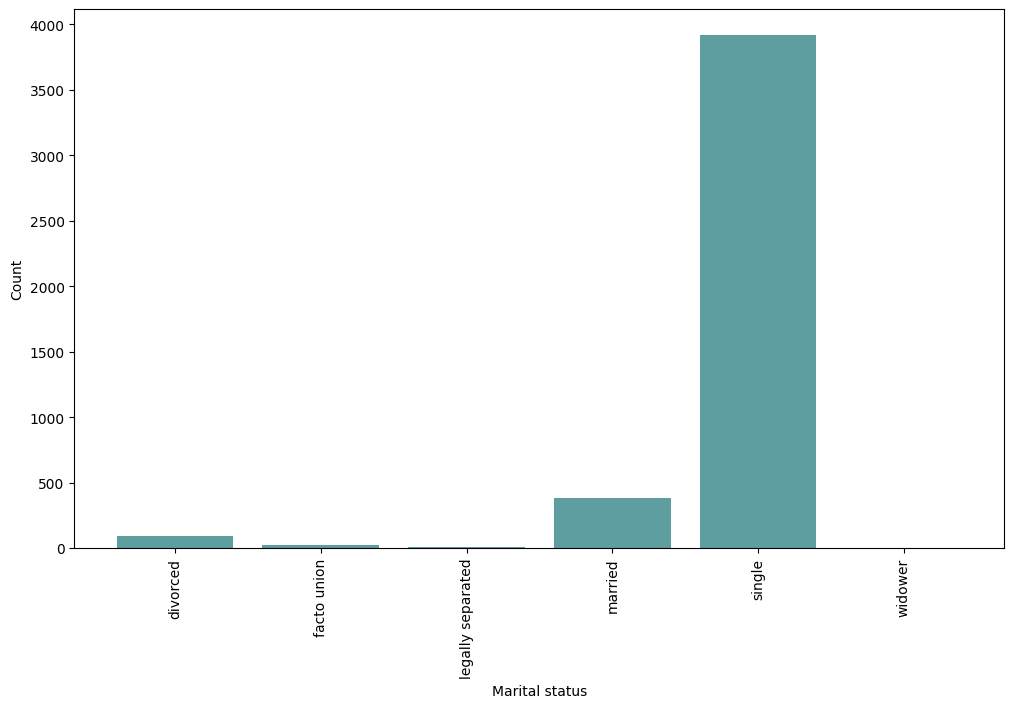

COURSE


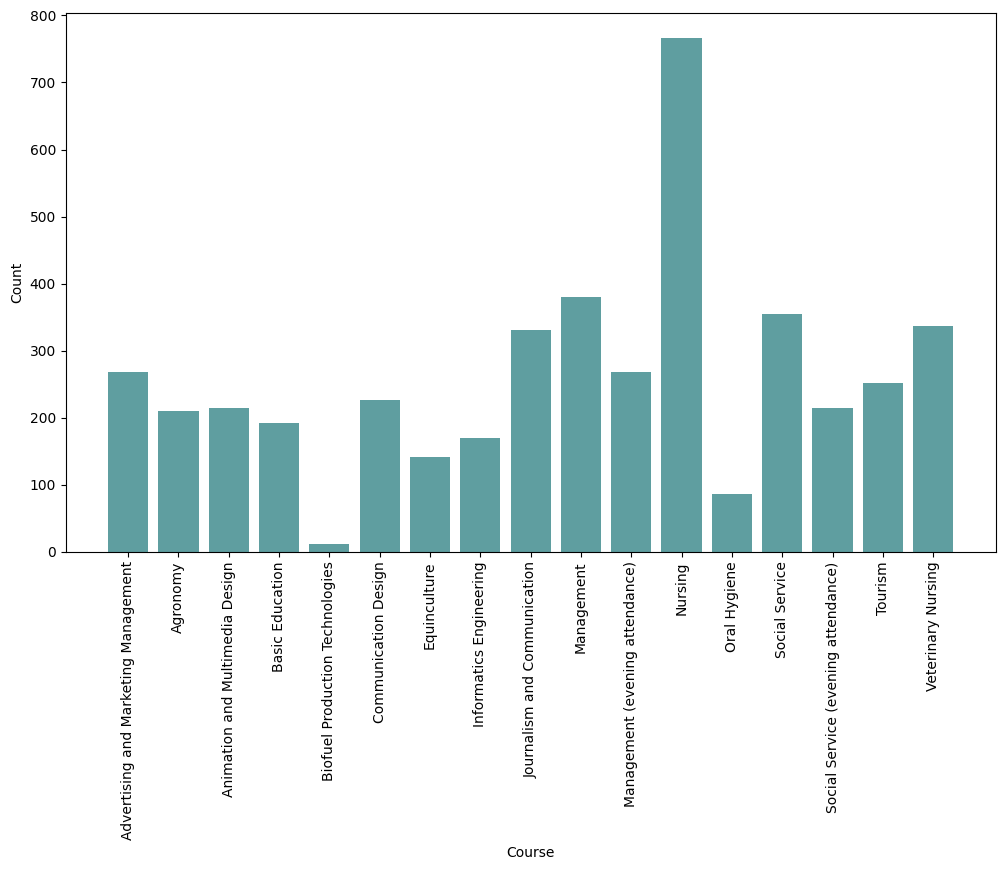

MORNING SHIFT PARTICIPATION


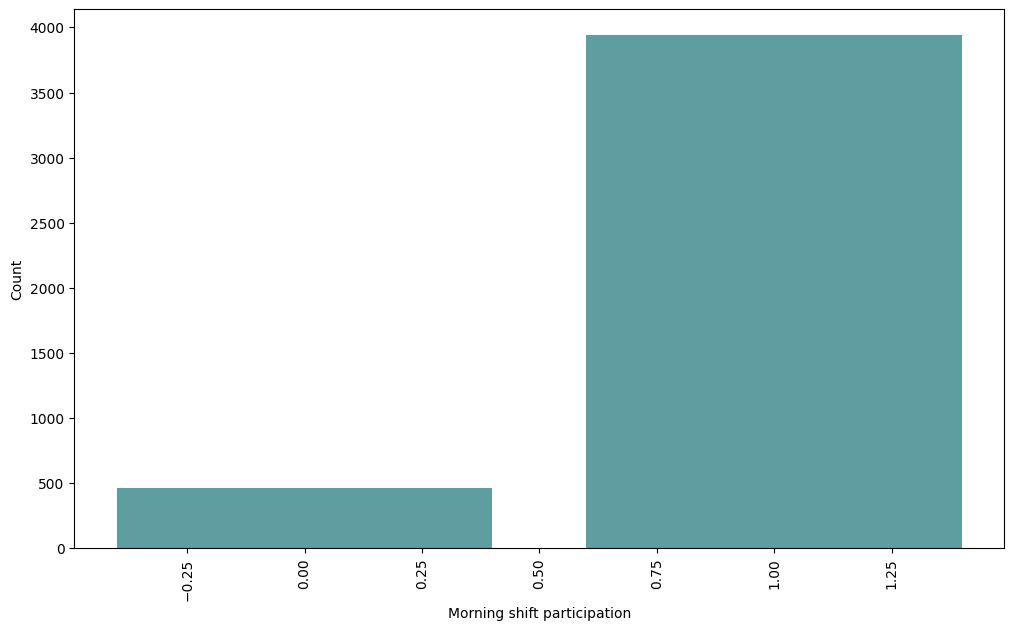

PREVIOUS QUALIFICATION


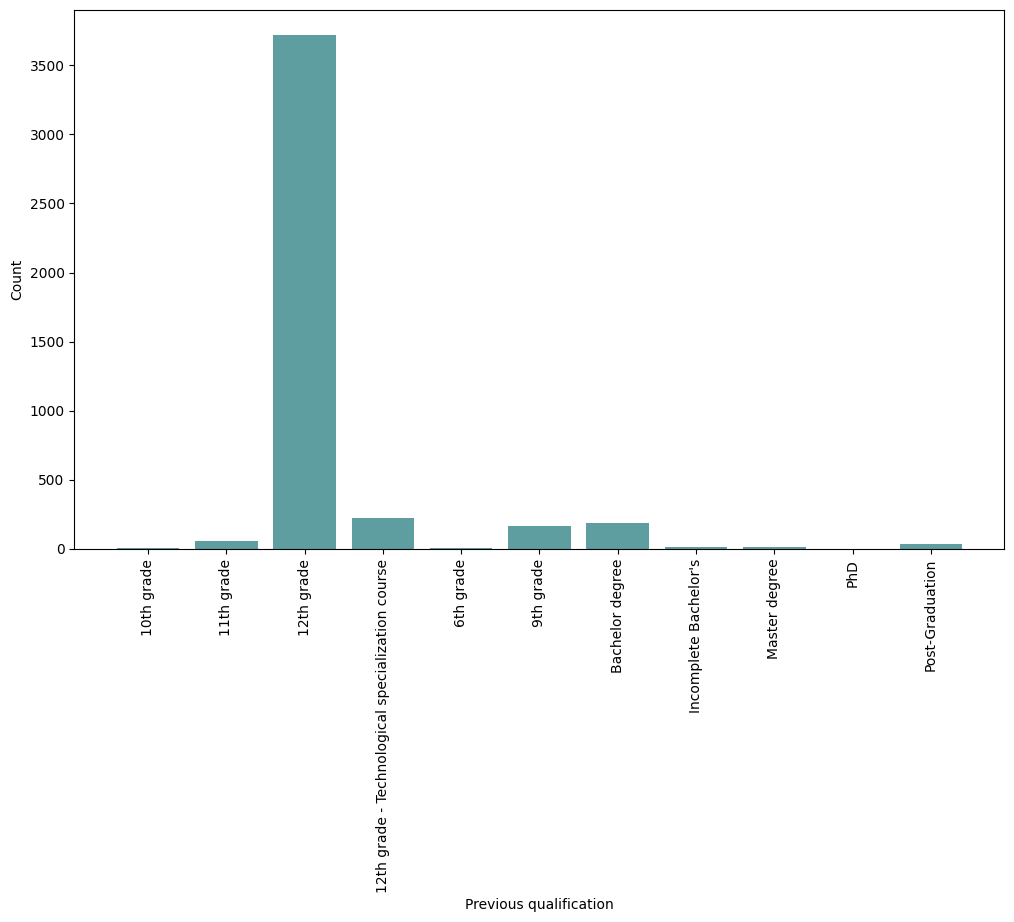

NATIONALITY


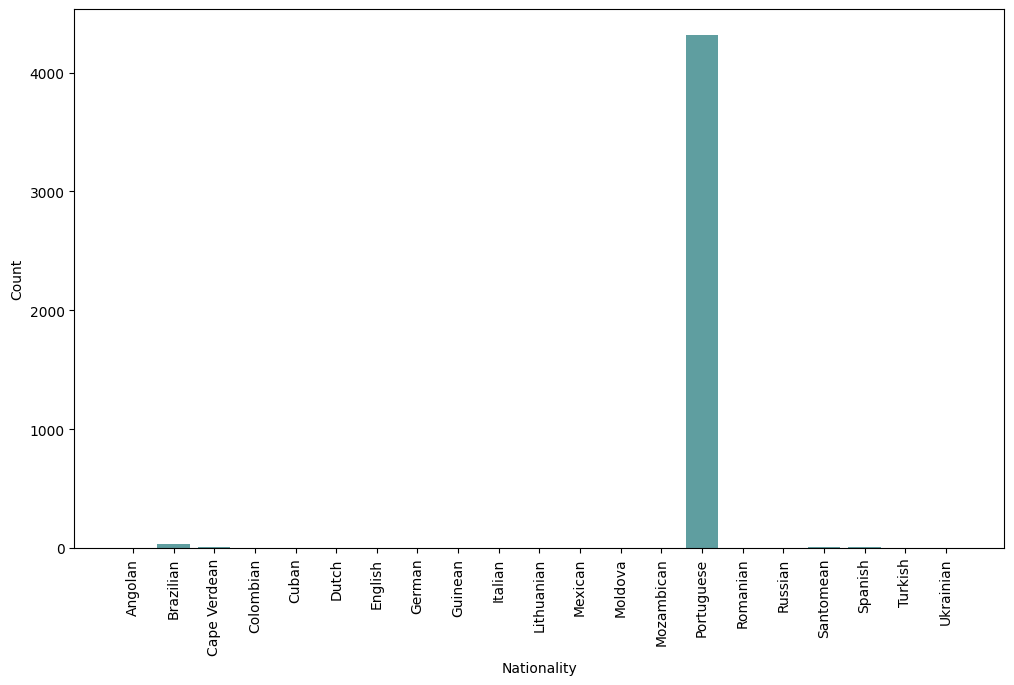

MOTHER'S QUALIFICATION


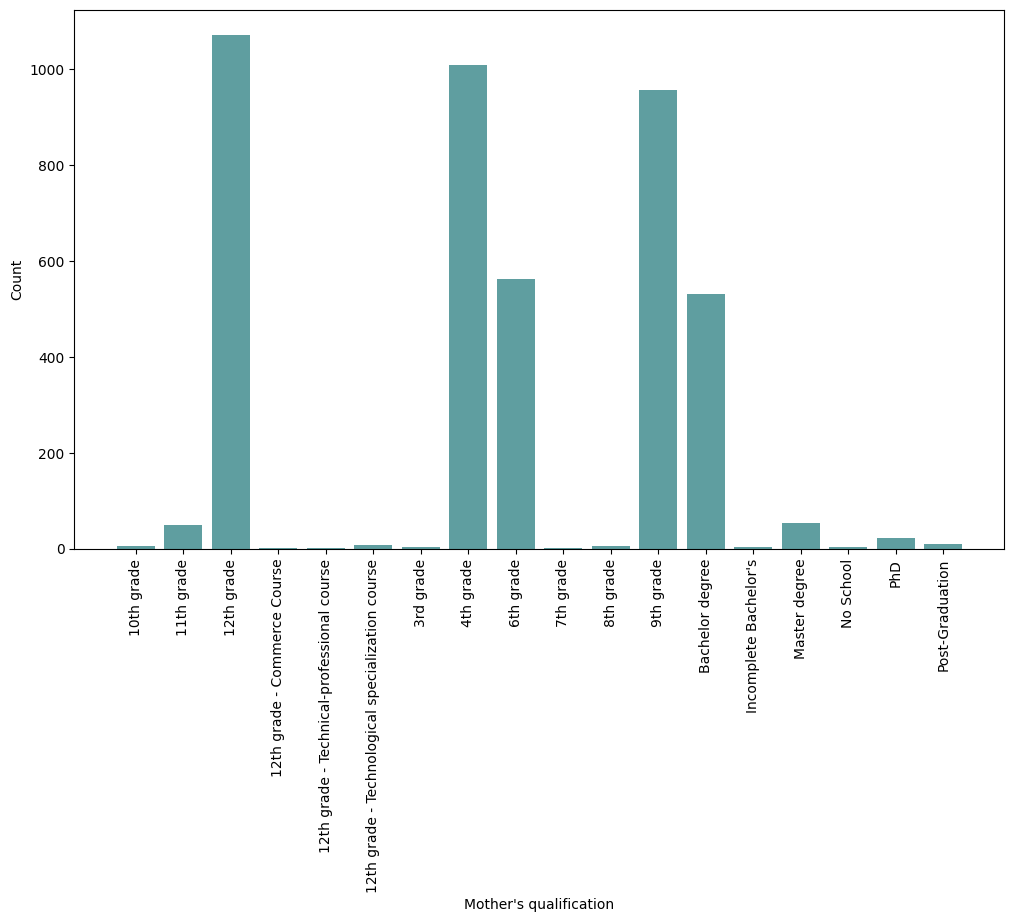

FATHER'S QUALIFICATION


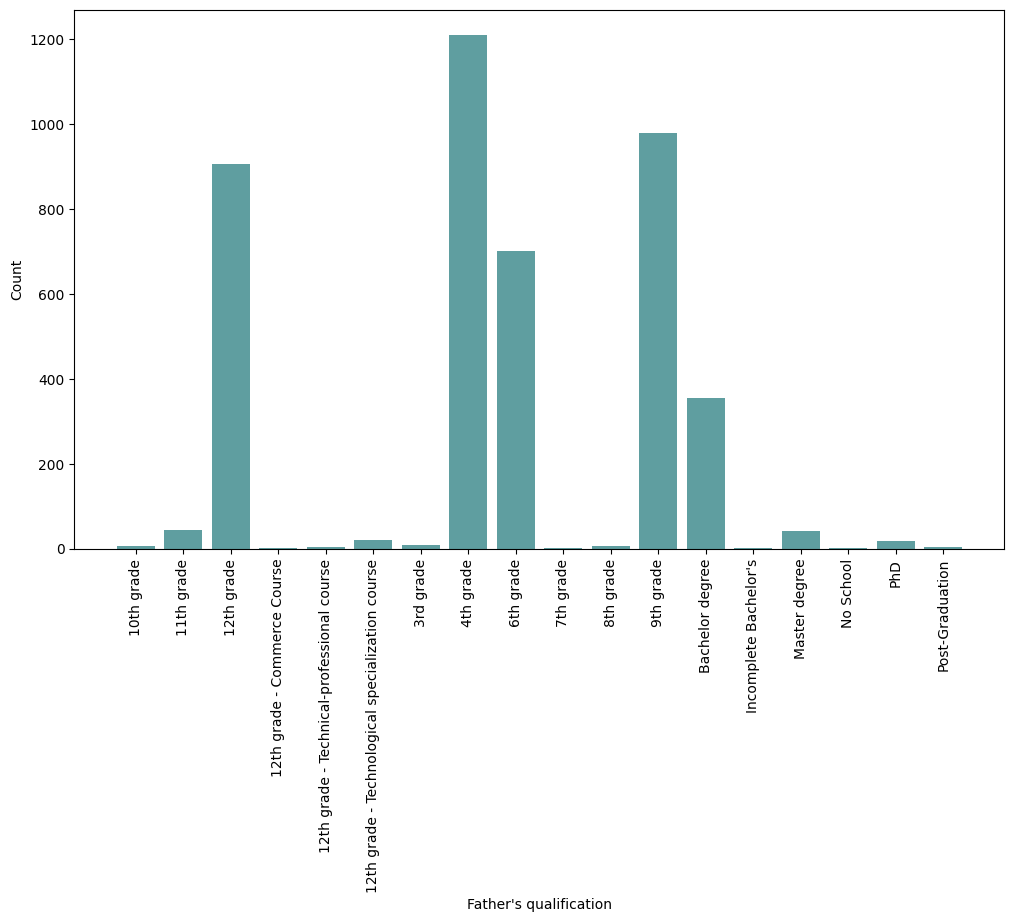

MOTHER'S OCCUPATION


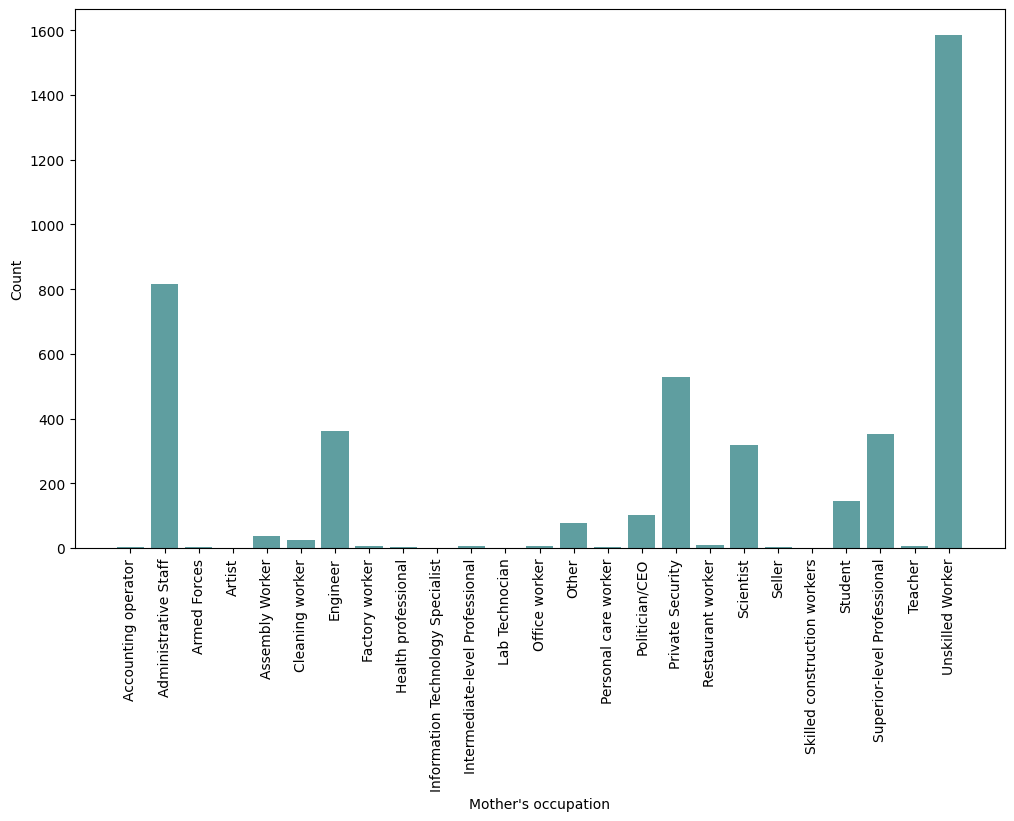

FATHER'S OCCUPATION


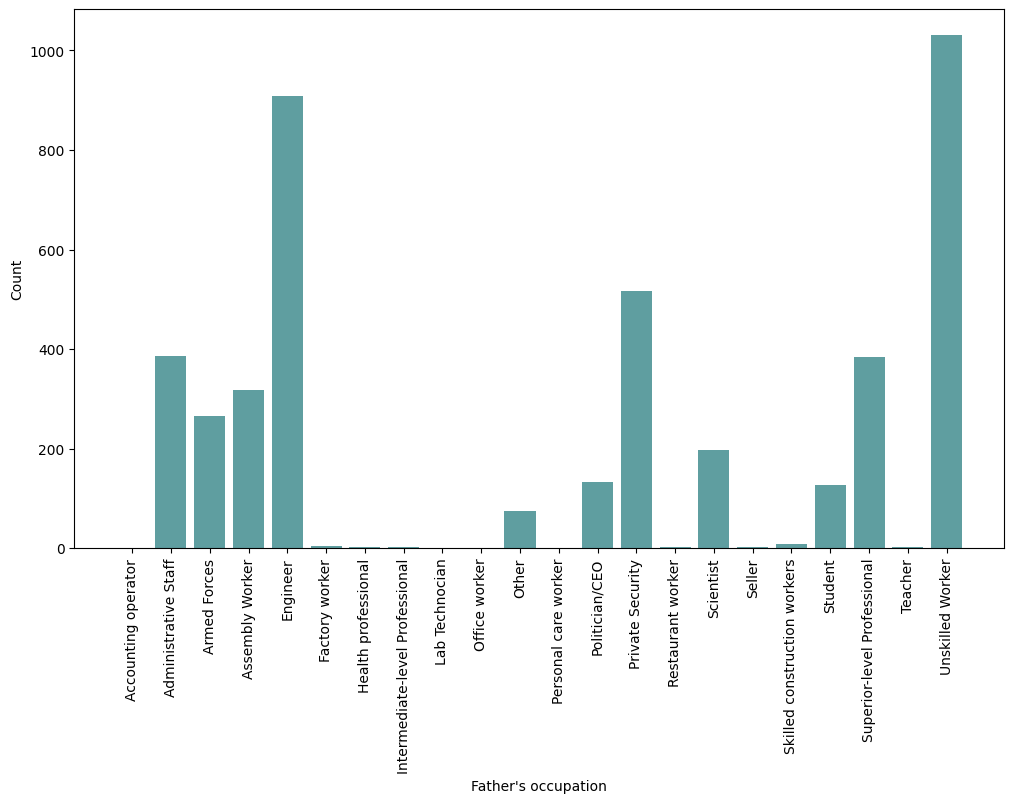

DISPLACED


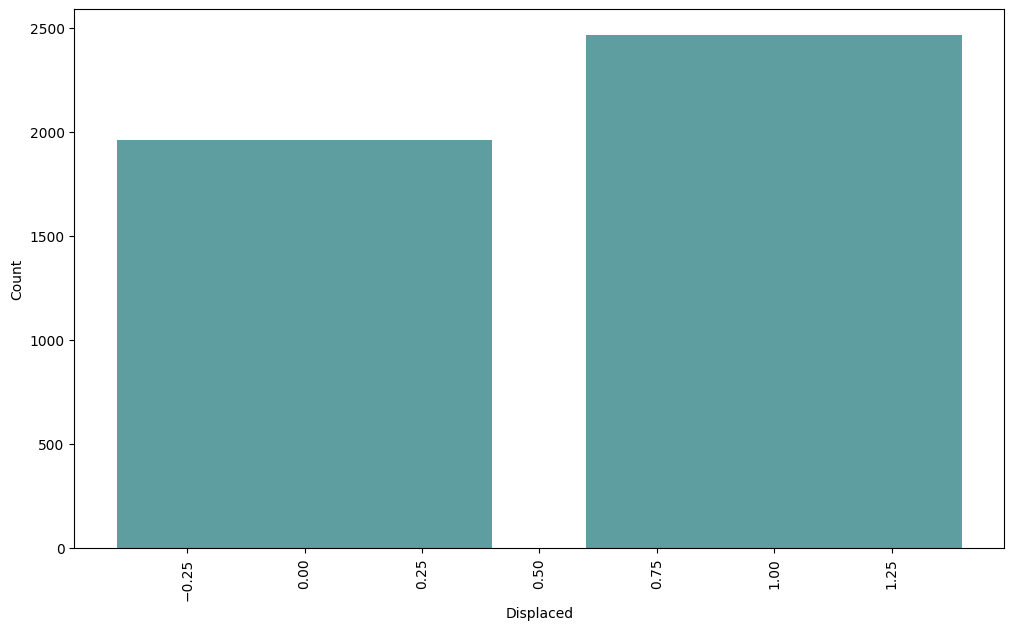

SPECIAL NEEDS


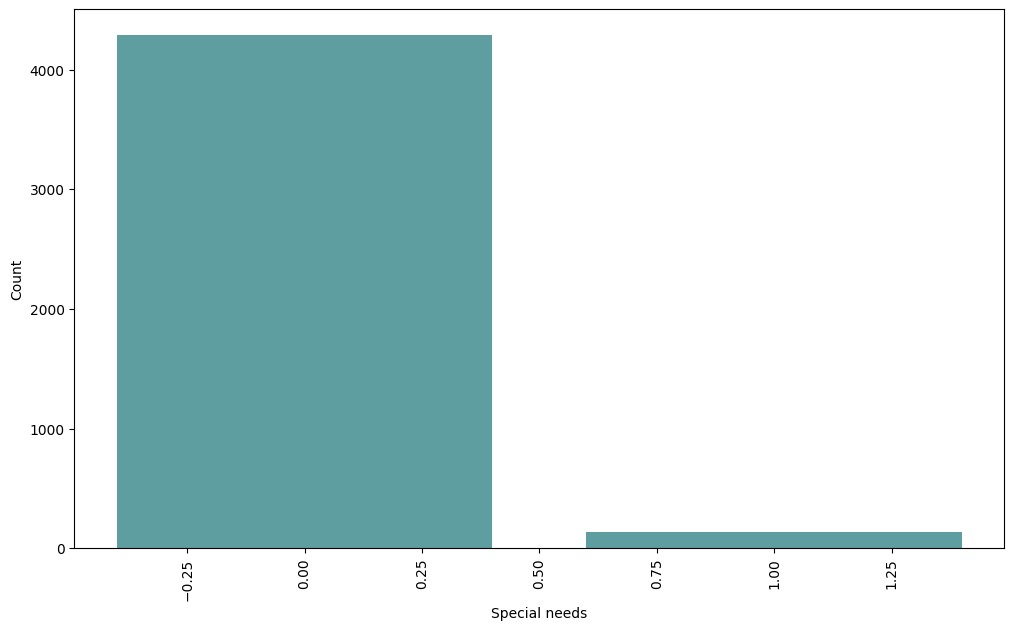

DEBTOR


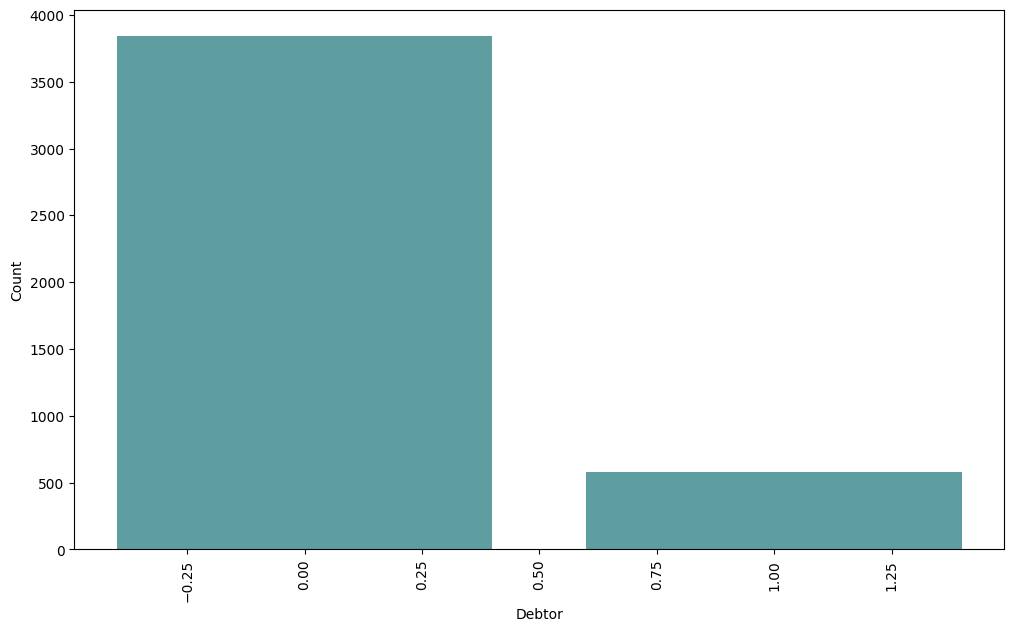

REGULARIZED FEES


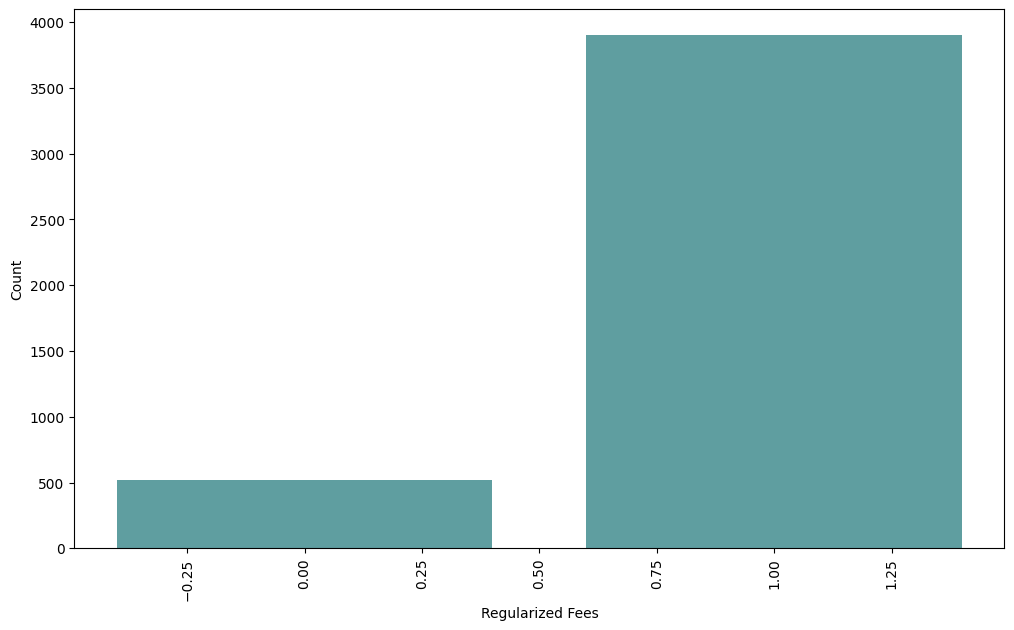

GENDER_MALE


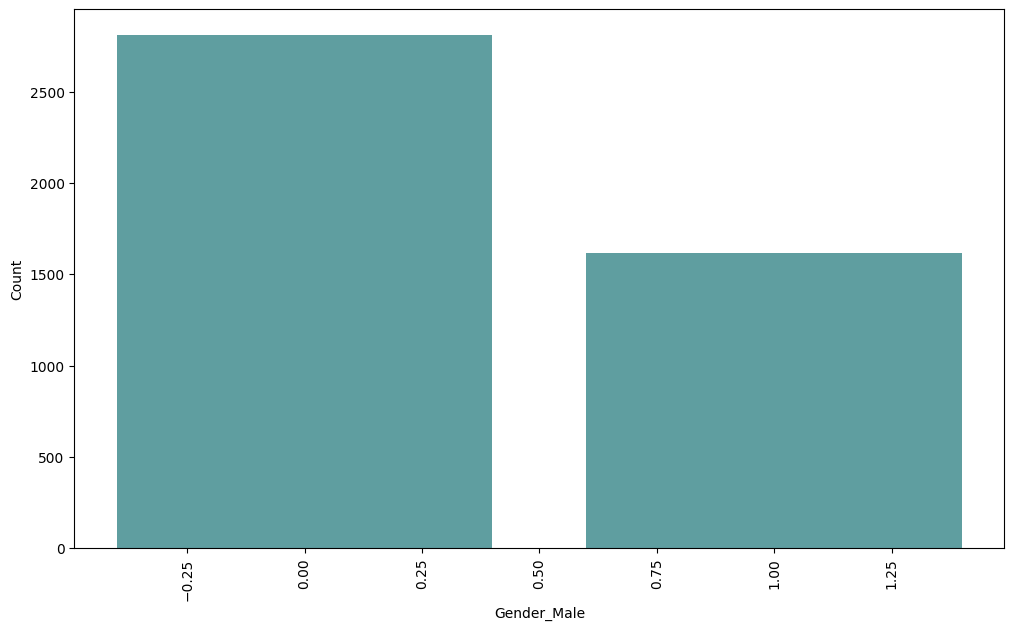

EXTERNAL FUNDING


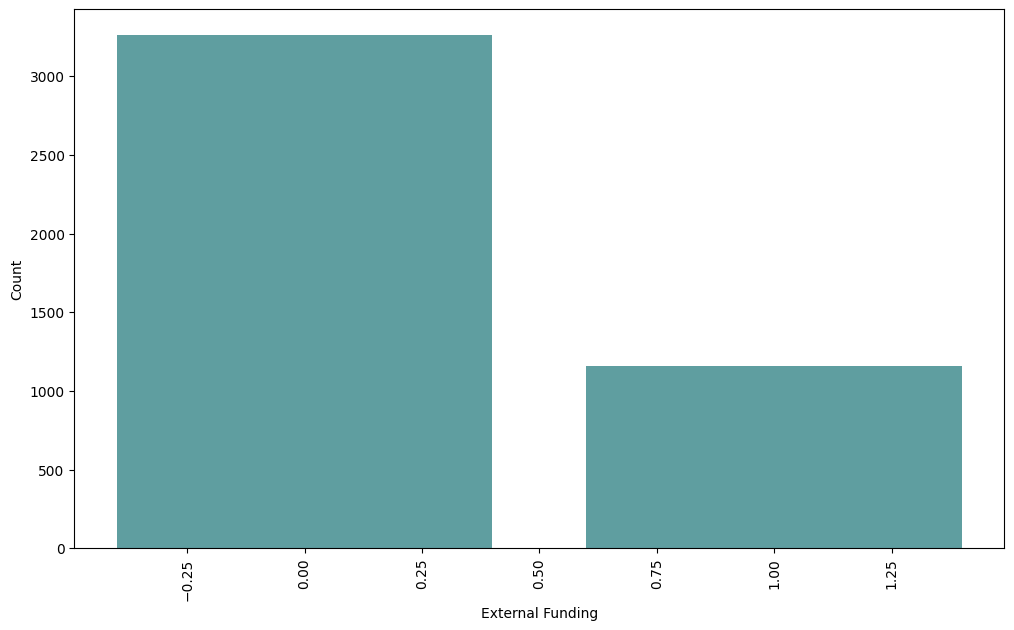

In [27]:
for col in data_c.columns[:-2]:
    print(col.upper())
    plot_bar_chart(data_c, col, vertical=True)

### Numerical Variables

In [28]:
# Get the numerical variables description
data_n.describe().T

,count,mean,std,min,25%,50%,75%,max
Application mode,4336.0,0.873616,0.818576,0.0,0.00,1.000000,1.000000,3.000000
Application order,4336.0,1.727168,1.317108,0.0,1.00,1.000000,2.000000,9.000000
Previous qualification score,4424.0,132.613314,13.188332,95.0,125.00,133.100000,140.000000,190.000000
Entry score,4424.0,126.978119,14.482001,95.0,117.90,126.100000,134.800000,190.000000
Age at enrollment,4336.0,23.271679,7.593933,17.0,19.00,20.000000,25.000000,70.000000
N units credited 1st period,4330.0,0.697229,2.335662,0.0,0.00,0.000000,0.000000,20.000000
N units taken 1st period,4336.0,6.045434,2.741204,0.0,5.00,6.000000,7.000000,26.000000
N scored units 1st period,4336.0,8.297048,4.181946,0.0,6.00,8.000000,10.000000,45.000000
N units approved 1st period,4330.0,4.706236,3.096520,0.0,3.00,5.000000,6.000000,26.000000
Average grade 1st period,4424.0,10.640822,4.843663,0.0,11.00,12.285714,13.400000,18.875000


In [29]:
# Get only the integers
integers_mask = data_n.applymap(lambda x: x.is_integer())
# Sum the ingers
integers_sum = integers_mask.sum(axis=0)

# Get the values that are not null
notnull_mask = data_n.notnull()
# Sum the values that are not null
notnull_sum = notnull_mask.sum(axis=0)

# Make the ratio of the integers
integers_ratio = integers_sum/notnull_sum

# create two lists: one for the intergers and one for the float numbers
columns_integer = []
columns_float = []
for col, ratio in integers_ratio.items():
    if ratio == 1:
        columns_integer.append(col)
    else:
        columns_float.append(col)

APPLICATION MODE


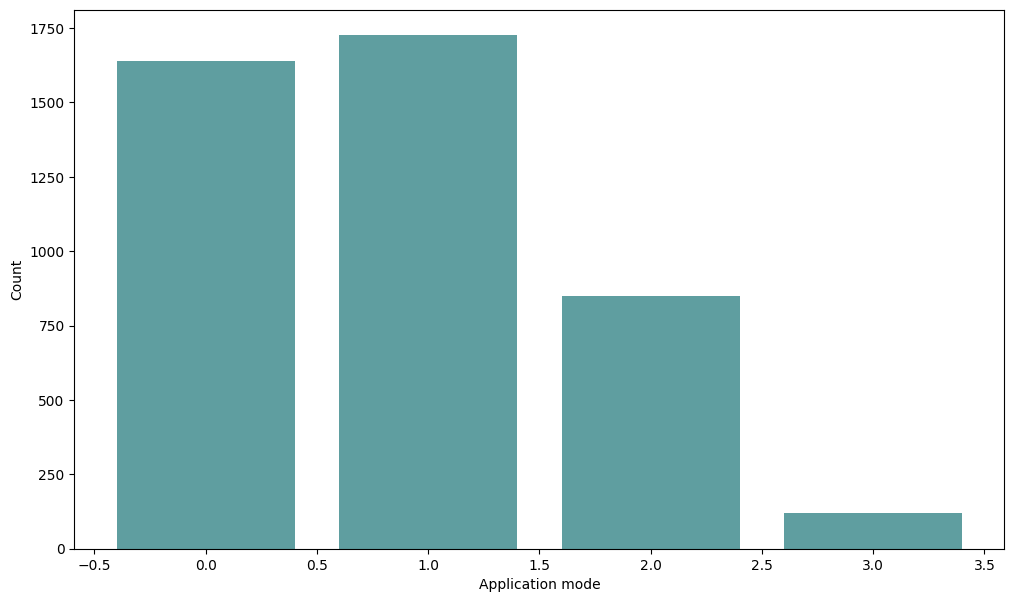

APPLICATION ORDER


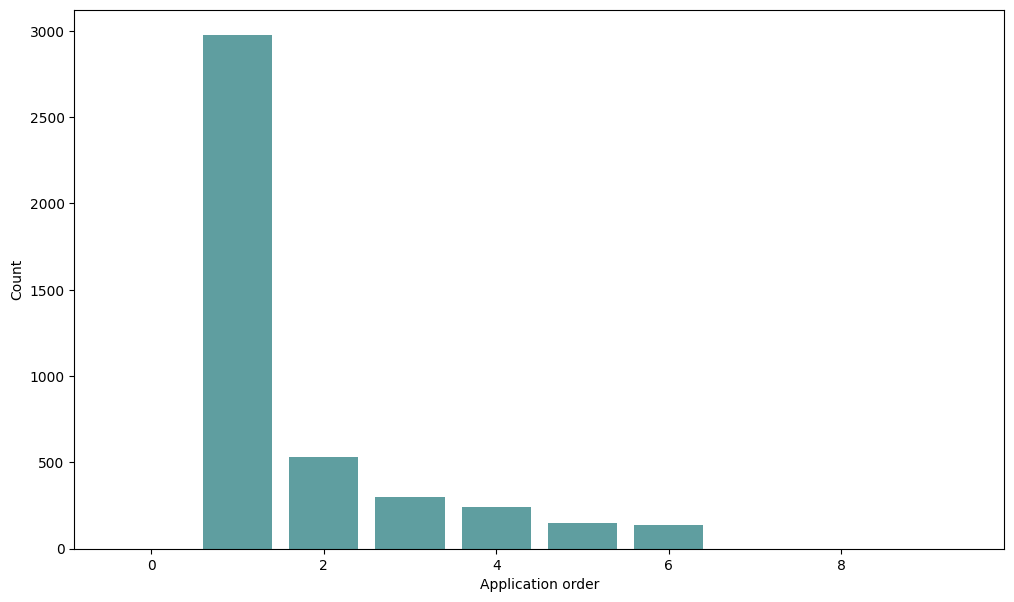

AGE AT ENROLLMENT


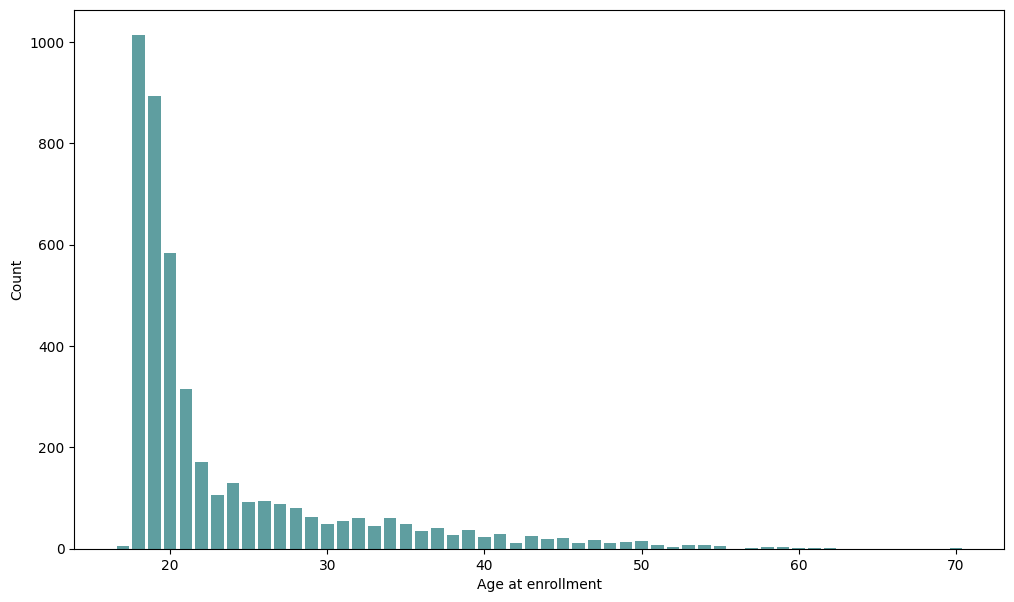

N UNITS CREDITED 1ST PERIOD


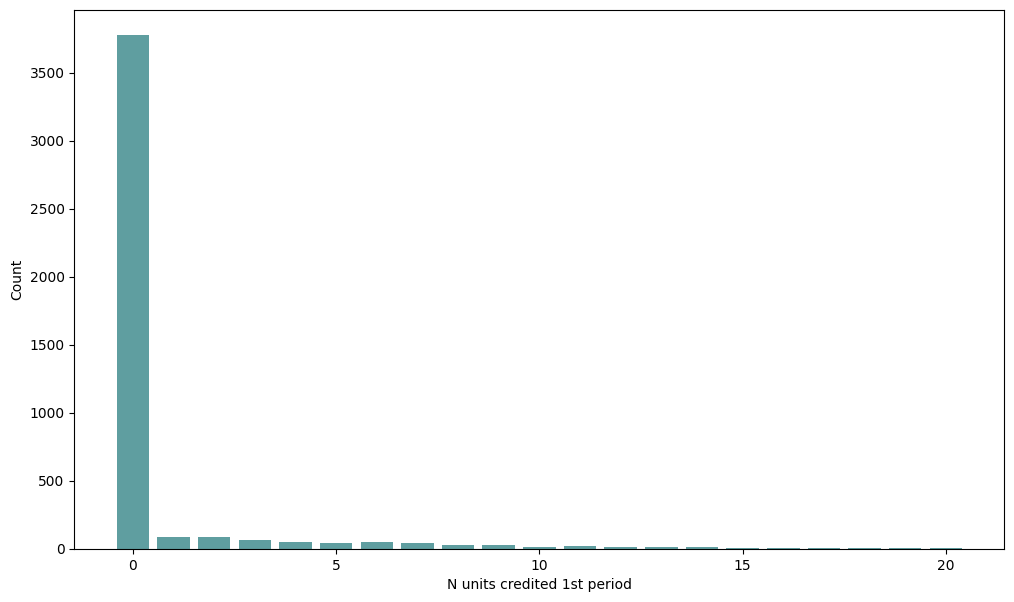

N UNITS TAKEN 1ST PERIOD


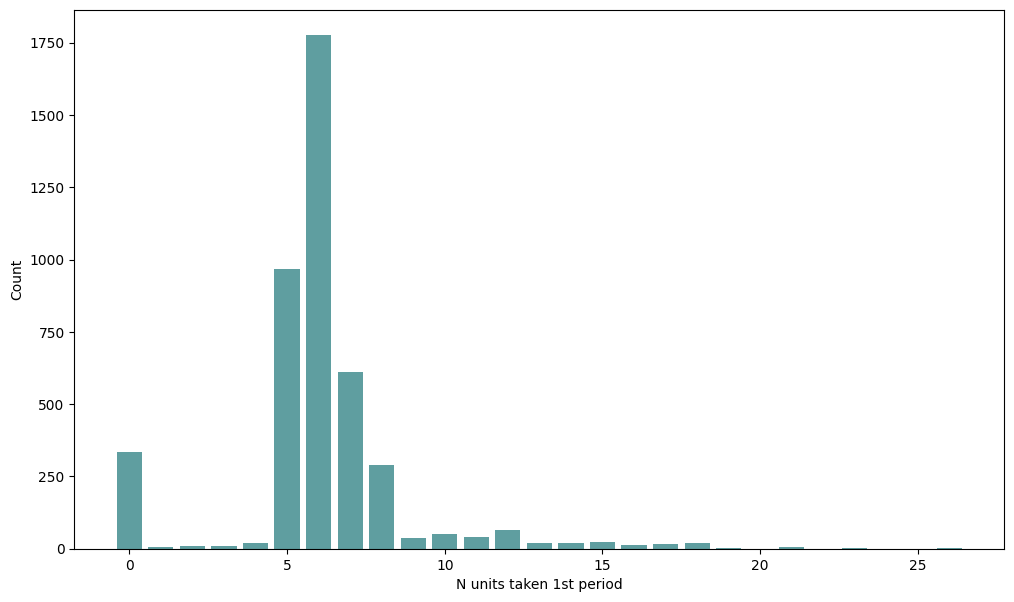

N SCORED UNITS 1ST PERIOD


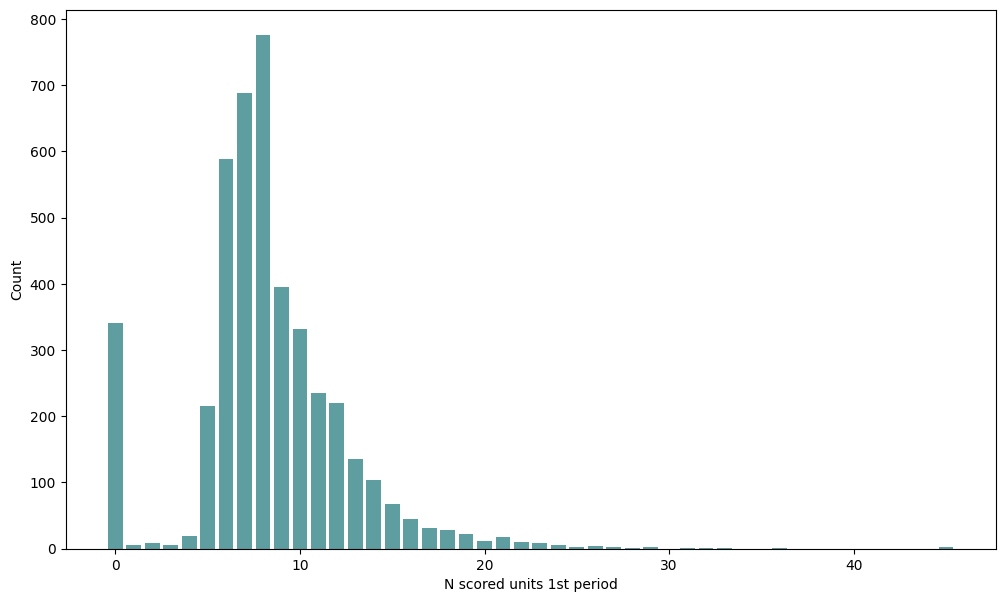

N UNITS APPROVED 1ST PERIOD


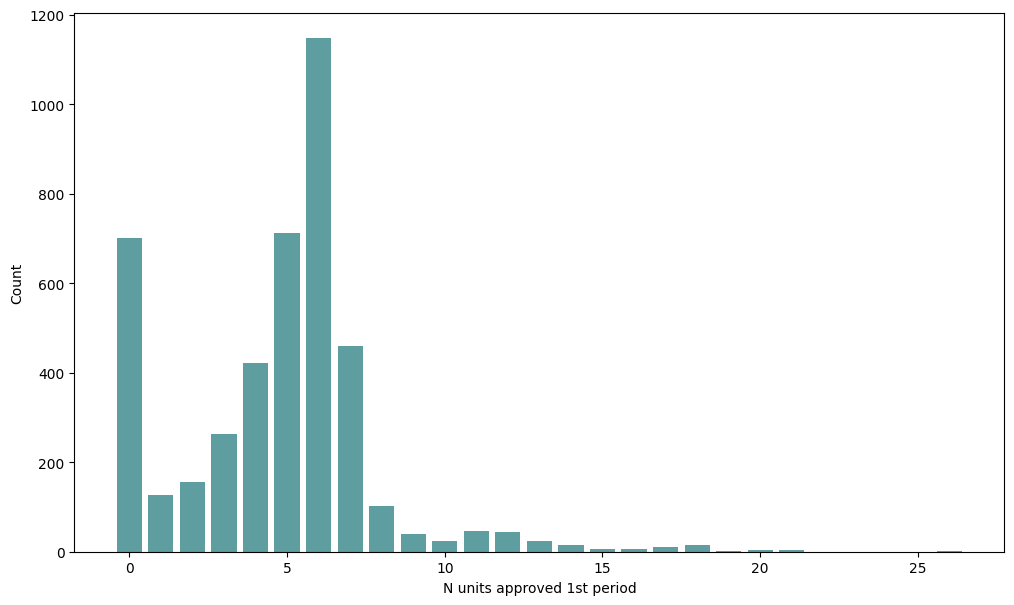

N UNSCORED UNITS 1ST PERIOD


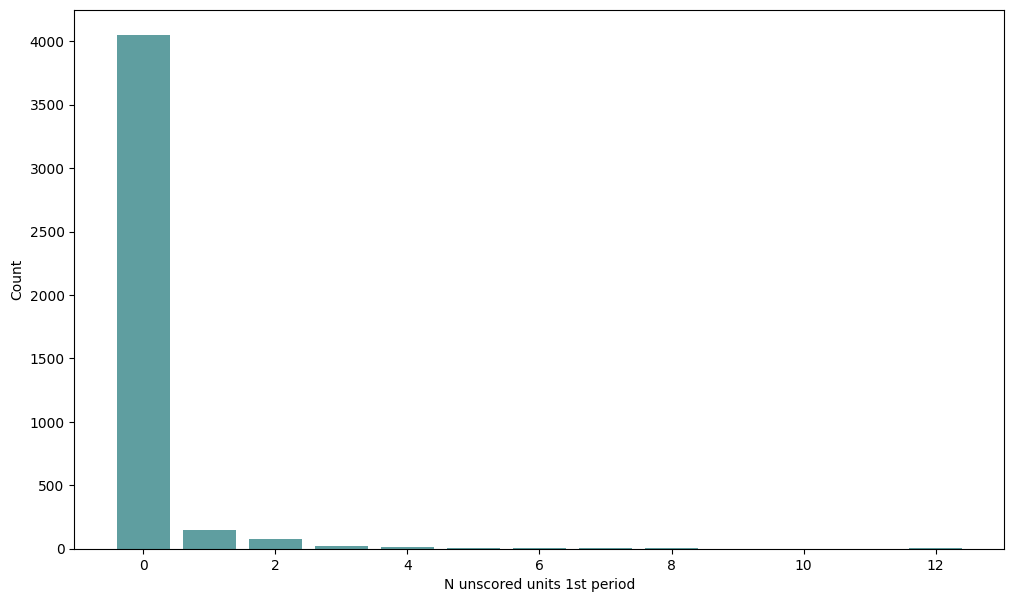

N UNITS CREDITED 2ND PERIOD


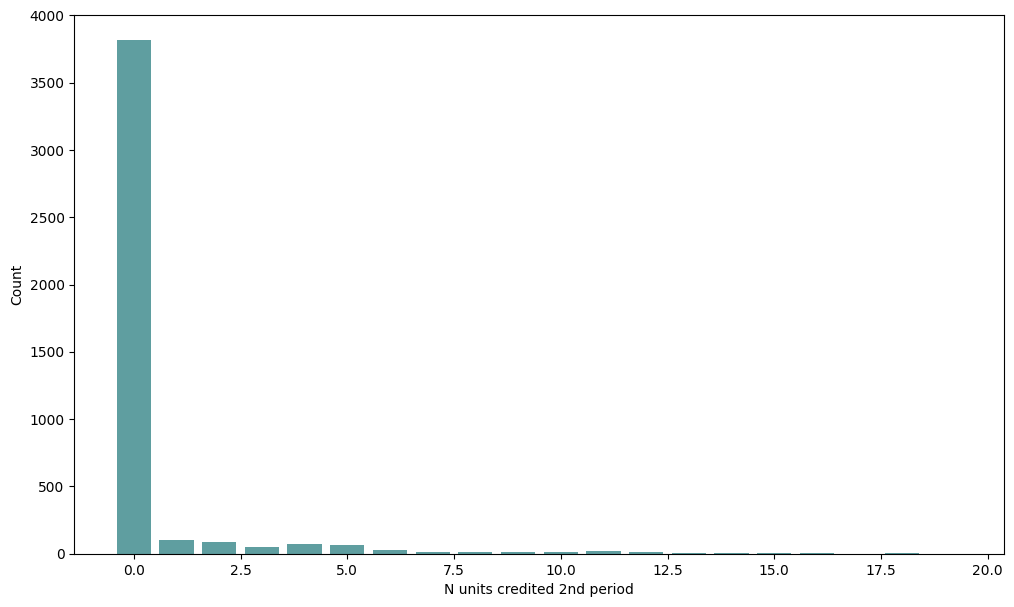

N UNITS TAKEN 2ND PERIOD


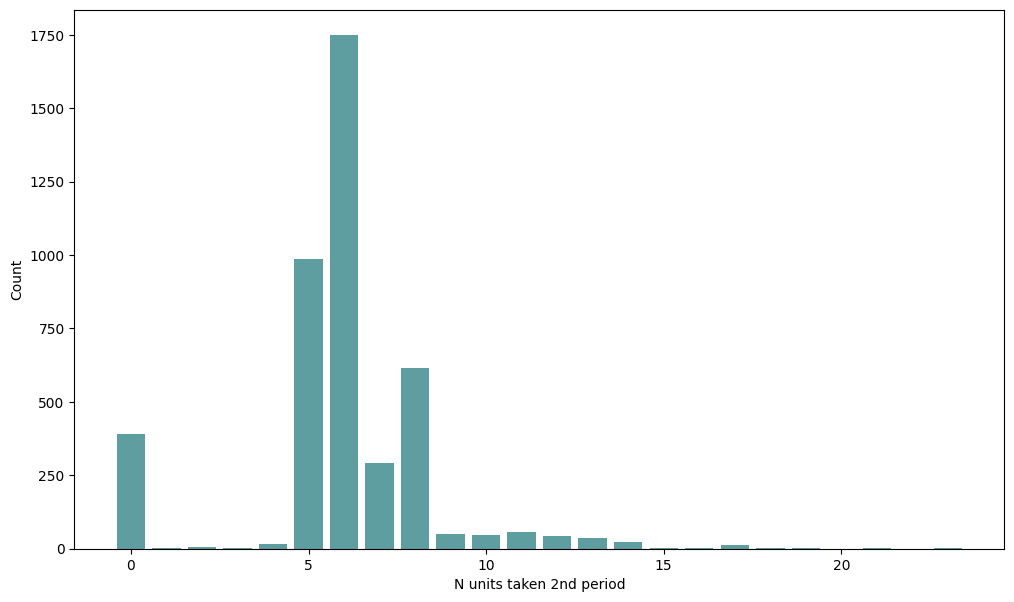

N SCORED UNITS 2ND PERIOD


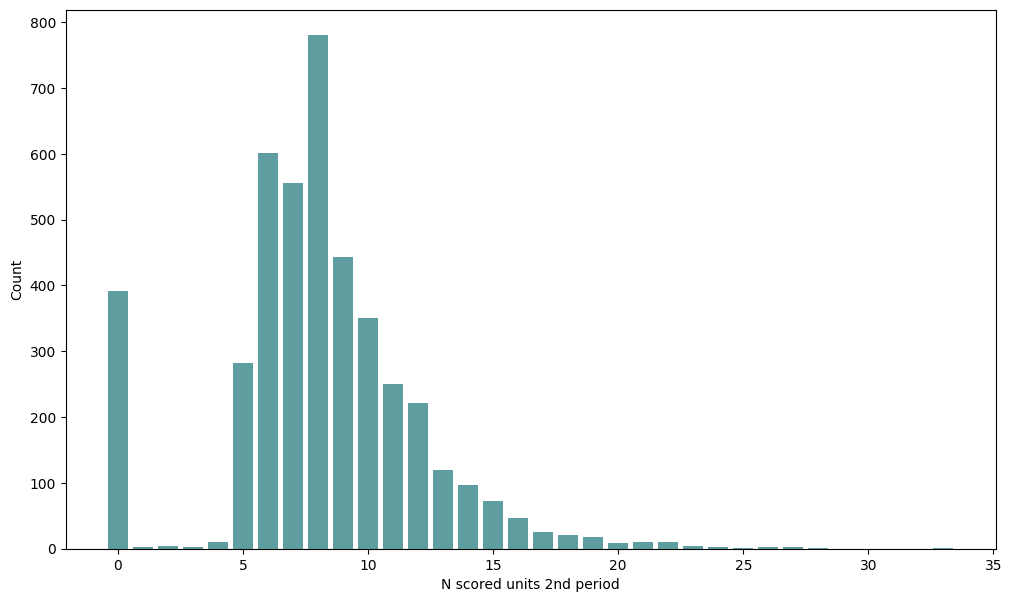

N UNITS APPROVED 2ND PERIOD


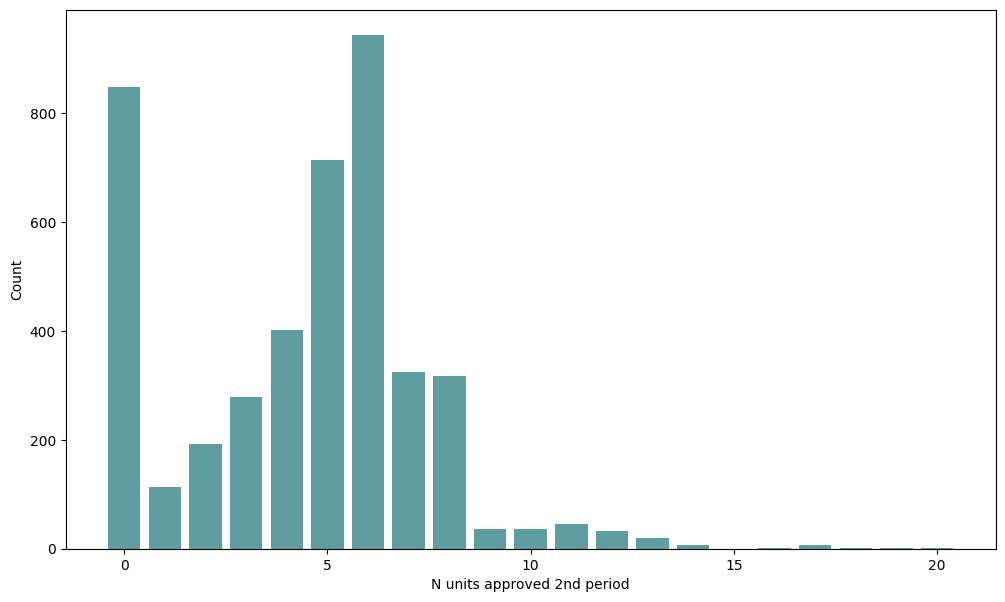

N UNSCORED UNITS 2ND PERIOD


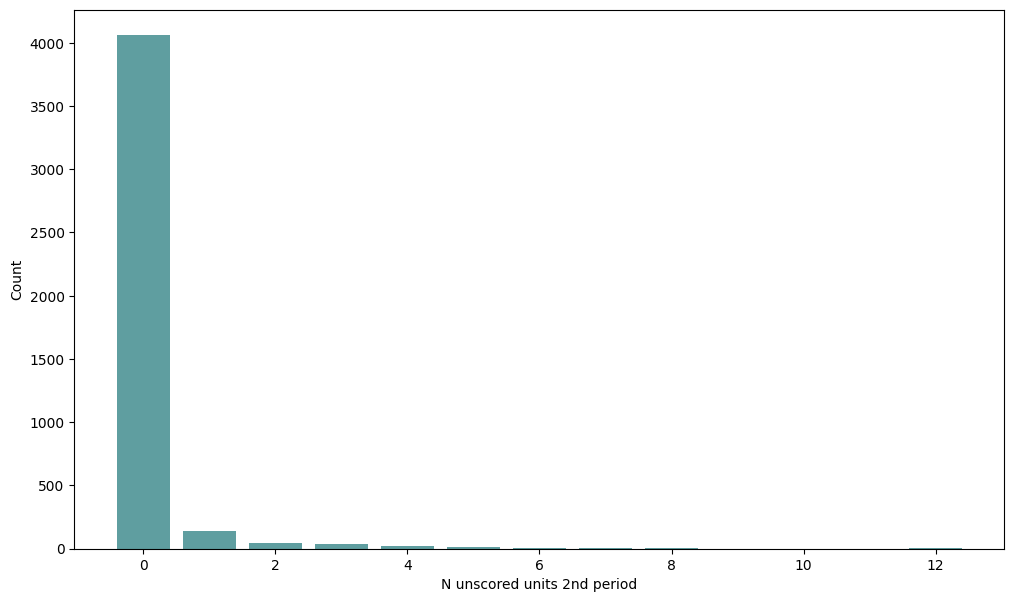

SOCIAL POPULARITY


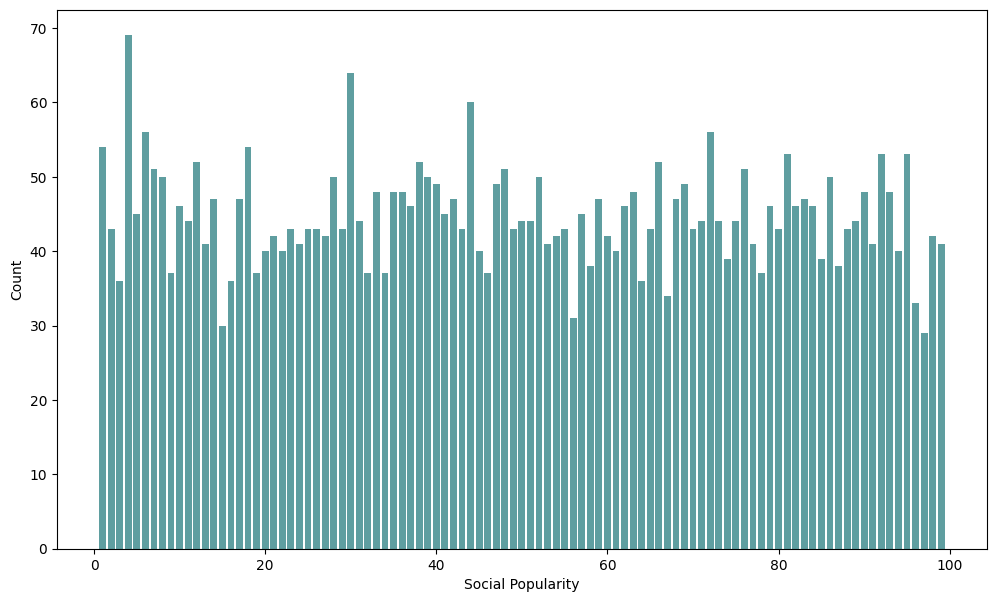

In [30]:
# Integer variables distribution
for col in columns_integer:
    print(col.upper())
    plot_bar_chart(data_n, col)

PREVIOUS QUALIFICATION SCORE


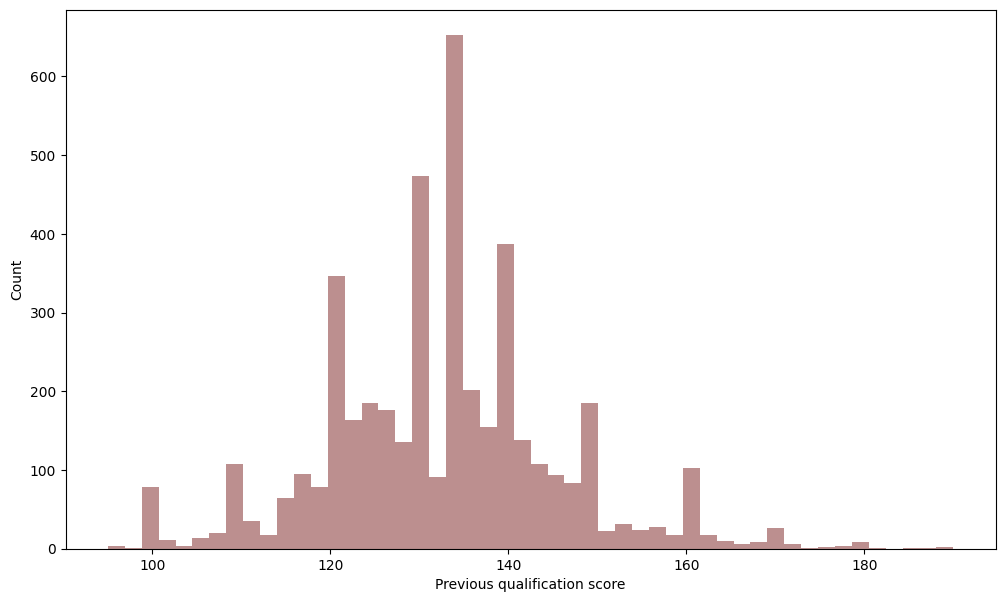

ENTRY SCORE


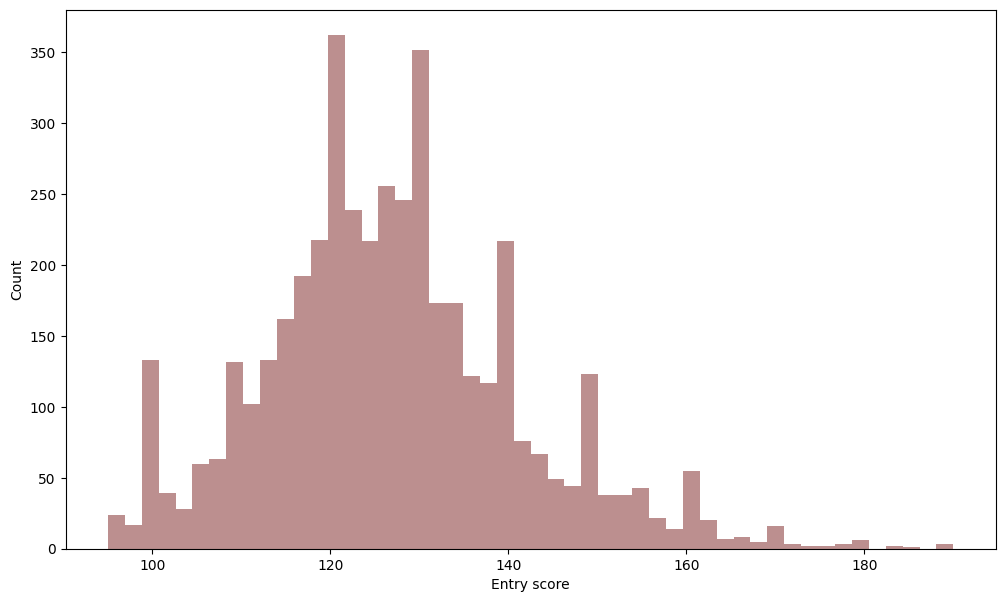

AVERAGE GRADE 1ST PERIOD


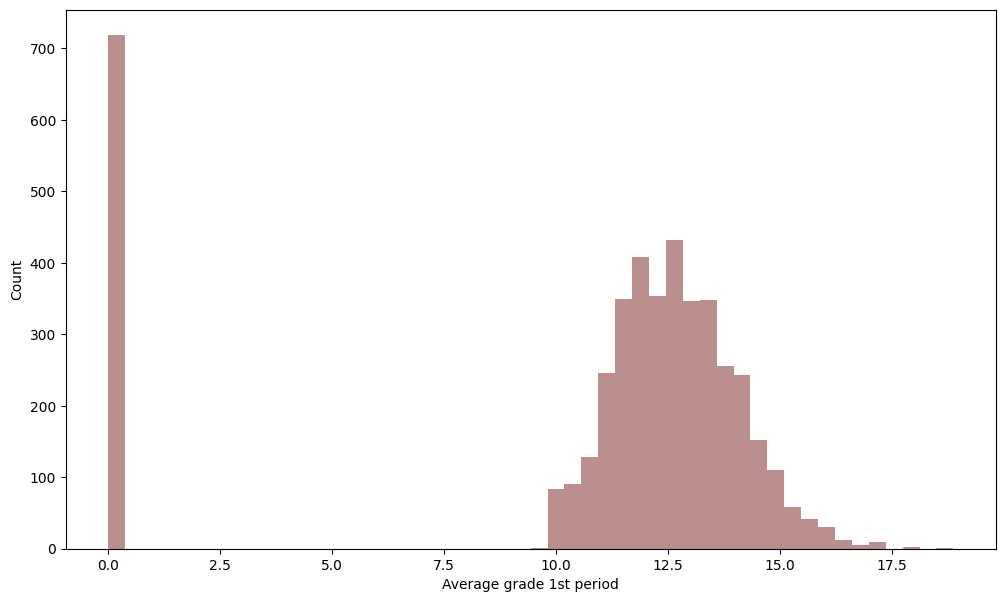

AVERAGE GRADE 2ND PERIOD


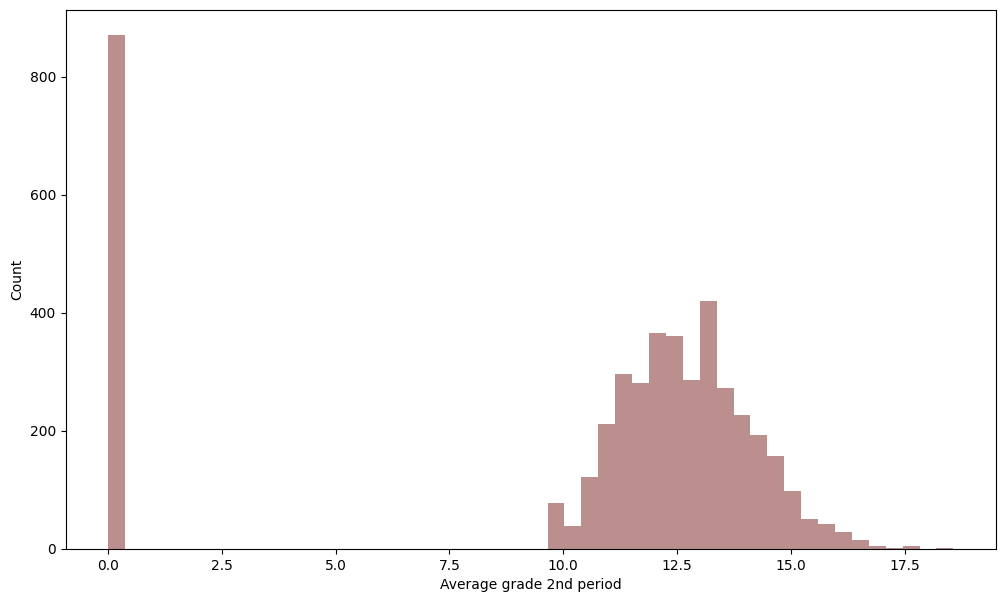

In [31]:
# Float variables distribution
for col in columns_float:
    print(col.upper())
    plot_histogram(data_n, col)

## Correlations <a class="anchor" id="1.5"></a>

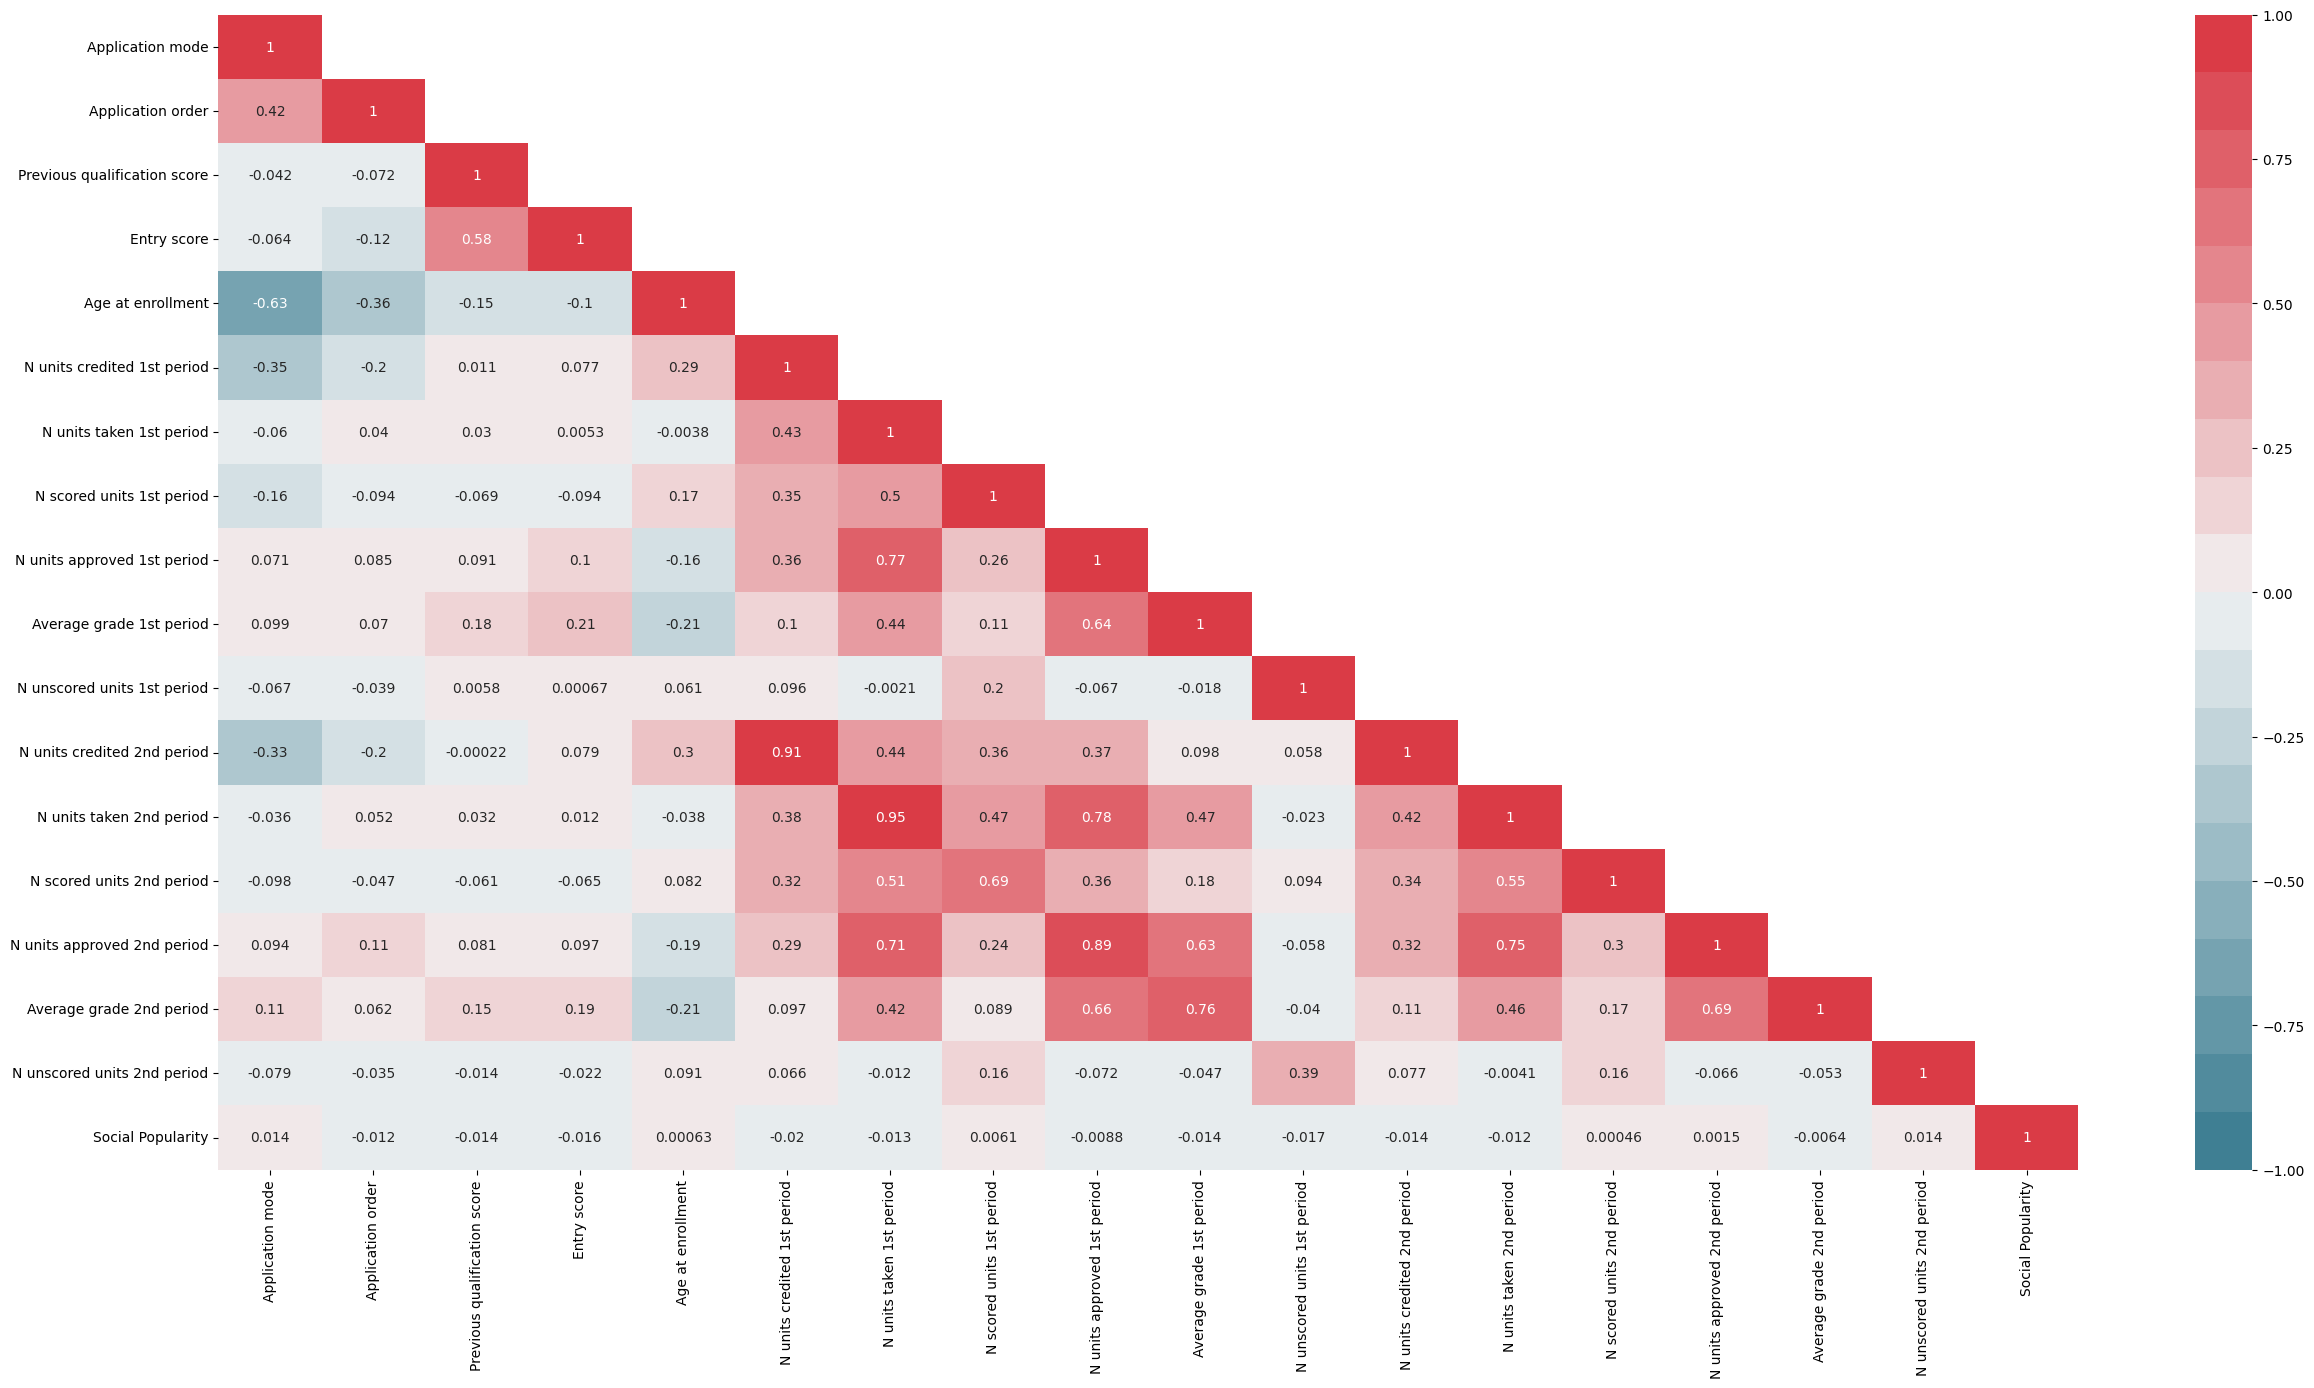

In [32]:
# Spearman correlation
plot_correlation_matrix(data_n, 'spearman')

### `Age at enrollment` x `Application mode`

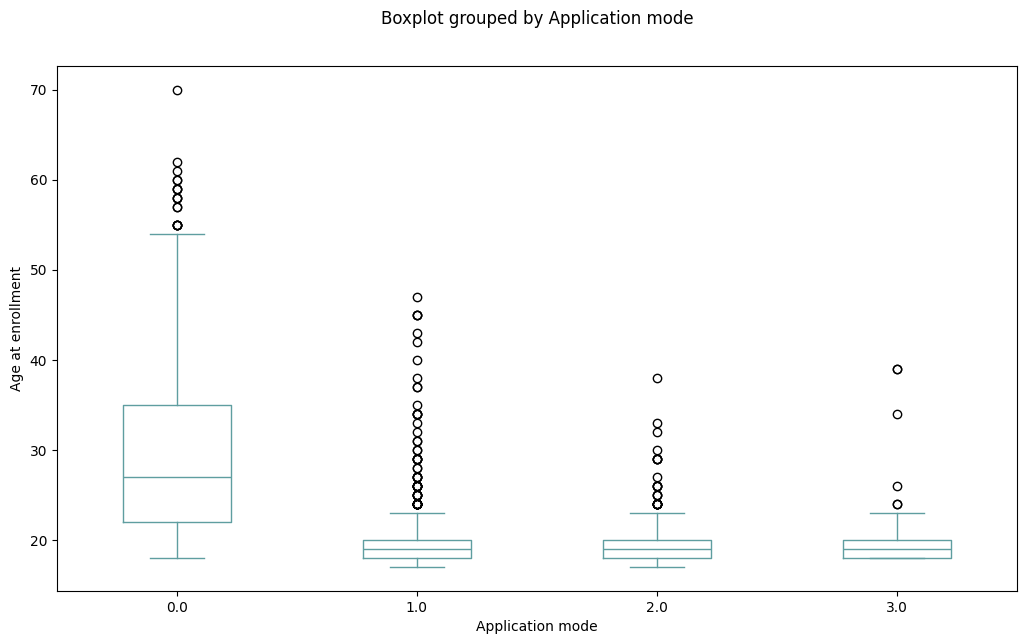

In [33]:
plot_box(data_n, 'Age at enrollment', 'Application mode') # CORRELATION -63%

### `Entry score` x `Previous qualification score`

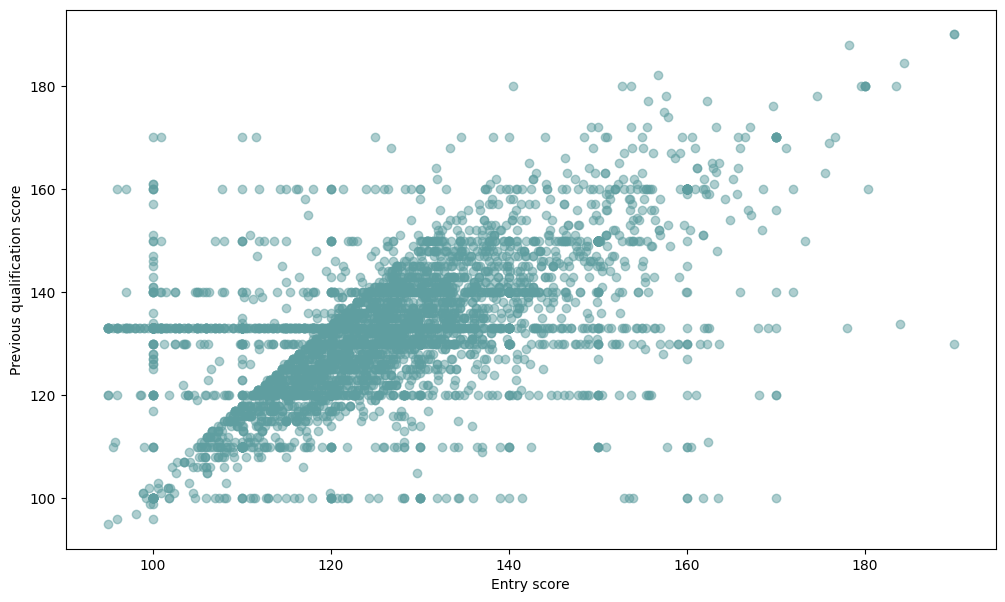

In [38]:
plot_scatter(data_n, 'Entry score', 'Previous qualification score') # CORRELATION 59%

### `N units taken` x `N units approved` (both periods)

In [39]:
corr_columns = ['N units taken 1st period', 'N units approved 1st period', #'Average grade 1st period',
                'N units taken 2nd period', 'N units approved 2nd period', #'Average grade 2nd period'
                ]

# Select specific columns for distribution comparison
corr_train = data_n.loc[:, corr_columns]

# Perform standard scaling on the numerical columns
corr_train_mm = MinMaxScaler().fit_transform(corr_train)

# Create a new DataFrame with the scaled values
corr_train_mm = pd.DataFrame(
    corr_train_mm, 
    columns=corr_train.columns, 
    index=corr_train.index)

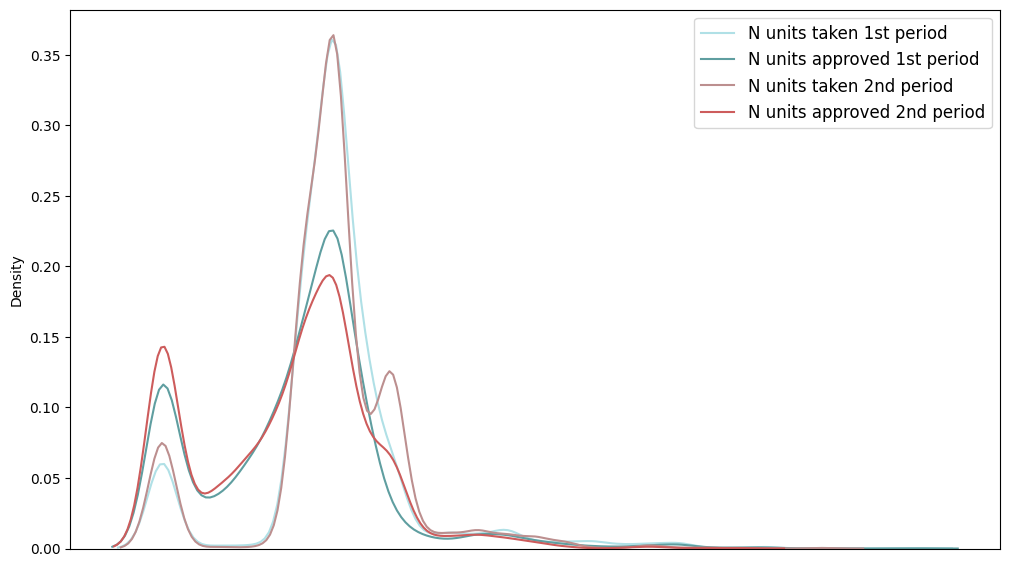

In [40]:
plot_kde(corr_train, corr_columns, ['powderblue', 'cadetblue', 'rosybrown', 'indianred'])
# CORRELATIONS
# Between "takens" 96%
# Between "approveds" 90%
# Between variables 72% (1st) & 69% (2nd)

# <font color='darkorange'> Feature Engineering <a class="anchor" id="2"></a>
  [Back to TOC](#toc)

## Data Cleaning & Normalization <a class="anchor" id="2.1"></a>

### `Average grade`

In [41]:
# Turn average grade to 0-200 scale
data['Average grade 1st period'] = data['Average grade 1st period'] * 10
data['Average grade 2nd period'] = data['Average grade 2nd period'] * 10

### `Course`

In [42]:
# Correct equiniculture course name
data['Course'] = data['Course'].replace('Equinculture', 'Echinculture')

# Erase "evening attendance" from course name
data['Course'] = data['Course'].str.replace(' (evening attendance)', '')

# Capitalize the courses' names
data['Course'] = data['Course'].str.capitalize()

## Feature Creation <a class="anchor" id="2.2"></a>

In [43]:
# Difference between entry score and course application mode entry score mean
data = calculate_mean_difference(data, 'Entry score', ['Course', 'Application mode'], 'Course application mode entry score difference')[0]

# Difference between average grade and course average grade mean for both periods
for col in [f'Average grade {semester} period' for semester in ['1st', '2nd']]:
    data = calculate_mean_difference(data, col, ['Course'], f'Course {col.lower()} difference')[0]

## Binarization <a class="anchor" id="2.3"></a>

### `Marital status`

In [44]:
# Single vs. others
data['Marital status'] = data['Marital status'].apply(lambda x: True if x == 'single' else False)

### `Nationality`

In [45]:
# Portugal vs. others
data['Nationality'] = data['Nationality'].apply(lambda x: True if x == 'Portuguese' else False)

### `Parents' Occupation`

In [46]:
# Turn parent's ocuppation to boolean: Skilled or Unskilled worker
for parent in ['Mother', 'Father']:
    var = f'{parent}\'s occupation'
    data[var] = data[var].apply(lambda x: False if x == 'Unskilled Worker' else True)

### `Previous Qualification`

In [47]:
# Create technology course variable
data['Technological course'] = data['Previous qualification'].astype(str).apply(
    lambda x: True if 'Technological' in x else False)

## Reclassifying <a class="anchor" id="2.4"></a>

### `Course`

In [48]:
# areas_dict = web_scraping_dges_areas('https://www.dges.gov.pt/guias/indarea.asp')
# areas_dict = dictionary_translator(areas_dict)
# areas_dict = dictionary_capitalizer(areas_dict)

# # Exporting the dictionary to a JSON file
# with open('areas_dict.json', 'w') as json_file:
#     json.dump(areas_dict, json_file)


# Importing the dictionary from a JSON file
with open(temp_path + 'areas_dict.json', 'r') as json_file:
    areas_dict = json.load(json_file)

In [49]:
# Function to map course to area
def map_course_to_area(course):
    words = course.split()

    for area, courses in areas_dict.items():
        
        if course in courses:
            return area
        
        elif words[-1].capitalize() in courses:
            return area
        
    return 'Engineering and related techniques' # Remaining courses category


# Apply mapping function to dataframe
data['Course area'] = data['Course'].apply(map_course_to_area)

In [50]:
# Check how many unique values in variabes Course and Areas
print('Courses:', len(data['Course'].unique()))
print('Areas:', len(data['Course area'].unique()))

Courses: 15
Areas: 10


In [51]:
# Drop Course variable
data.drop(columns=['Course'], inplace=True)

### `Qualifications`

In [52]:
# Turn the values of Previous, Mother, anf Father Qualifications to the number of years of education
for person in ['Previous', 'Mother\'s', 'Father\'s']:
    var = f'{person} qualification'
    data[var] = data[var].astype(str).apply(get_years_of_education)

## Visualizations <a class="anchor" id="2.5"></a>

MARITAL STATUS


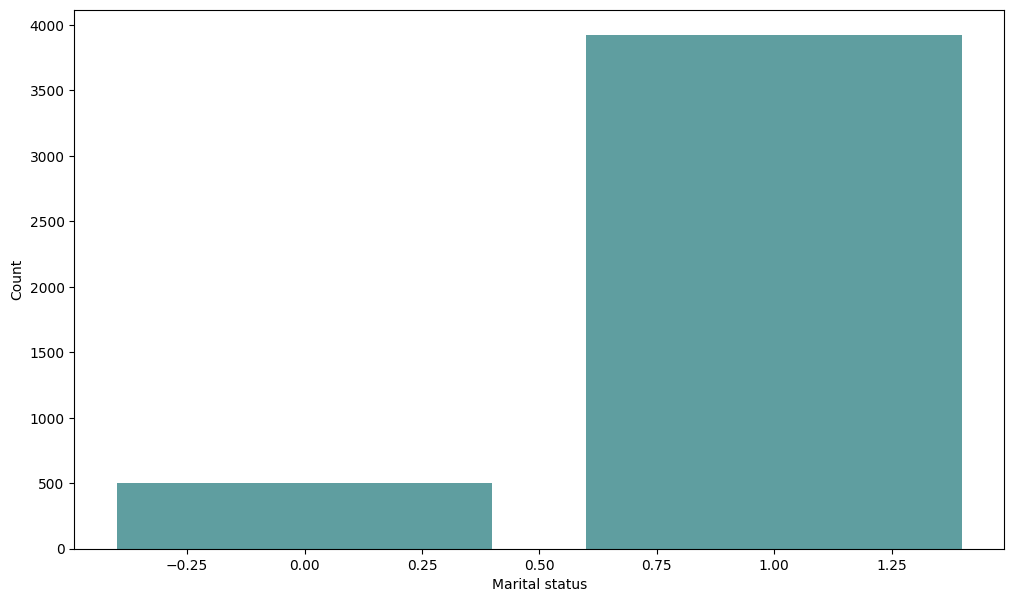

NATIONALITY


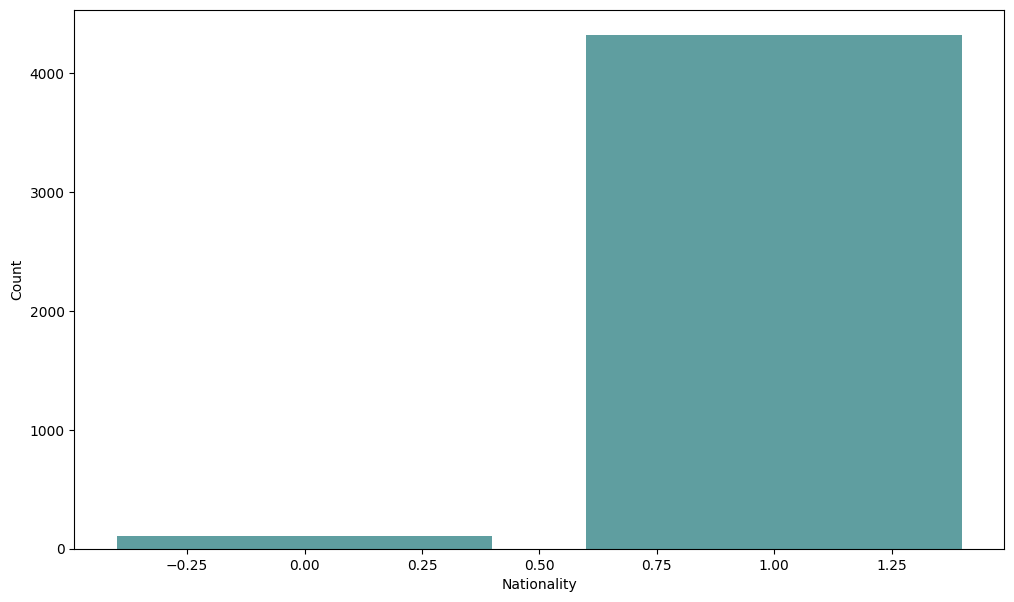

TECHNOLOGICAL COURSE


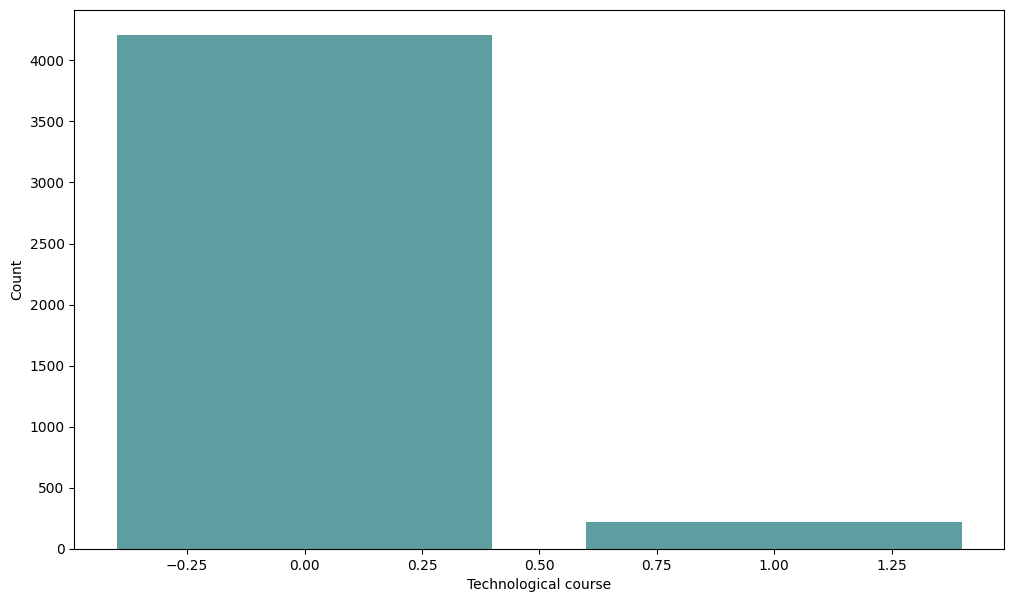

COURSE AREA


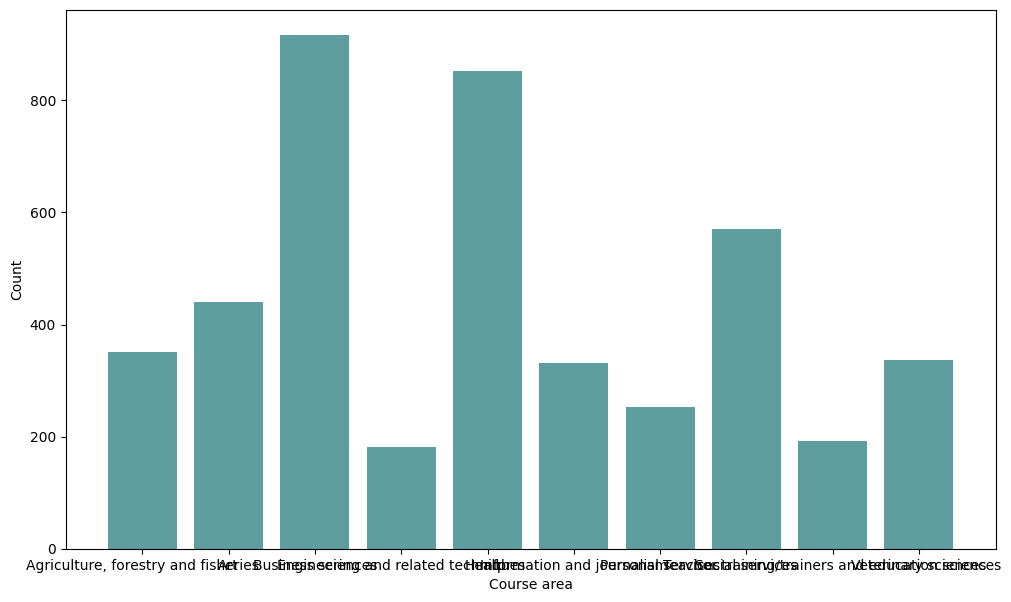

In [53]:
# Compare the enumerated four categorical variables with the Target
for col in ['Marital status', 'Nationality', 'Technological course', 'Course area']:
    print(col.upper())
    plot_bar_chart(data, col)

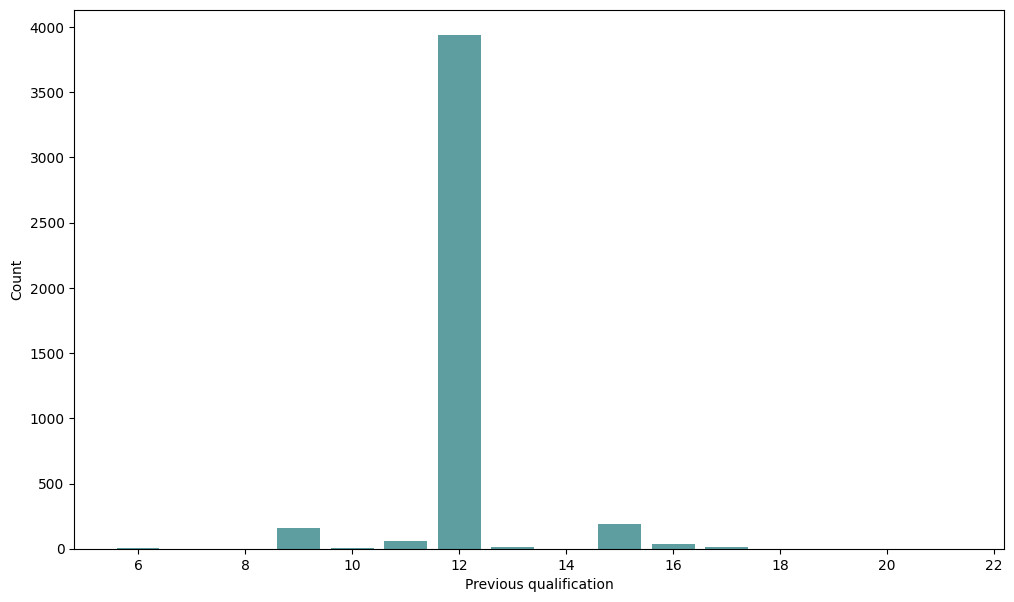

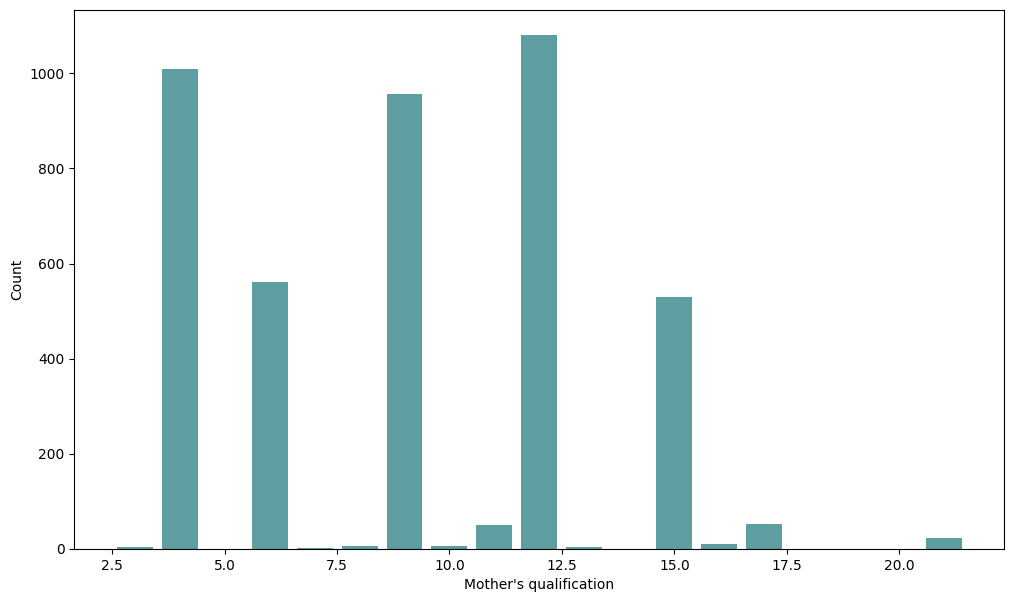

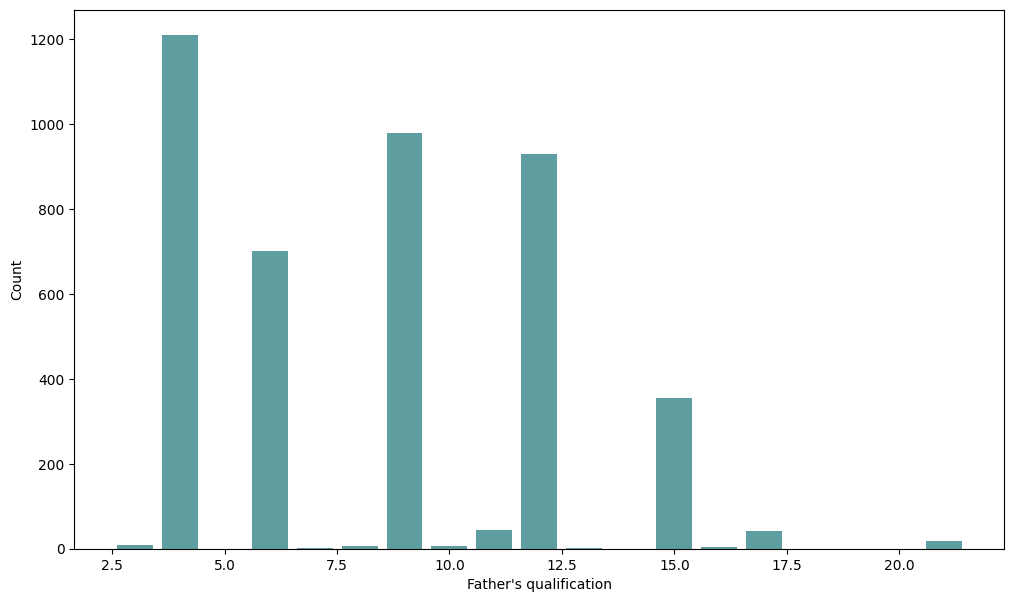

In [54]:
# Visualize the changes of Previous, Mother, anf Father Qualifications
for person in ['Previous', 'Mother\'s', 'Father\'s']:
    var = f'{person} qualification'
    plot_bar_chart(data, var)

COURSE APPLICATION MODE ENTRY SCORE DIFFERENCE


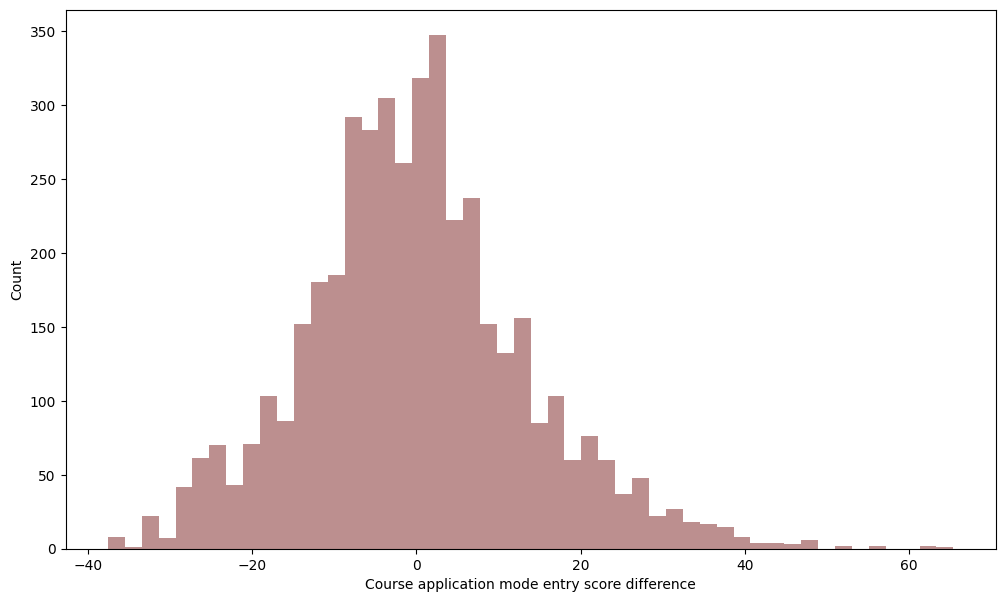

COURSE AVERAGE GRADE 1ST PERIOD DIFFERENCE


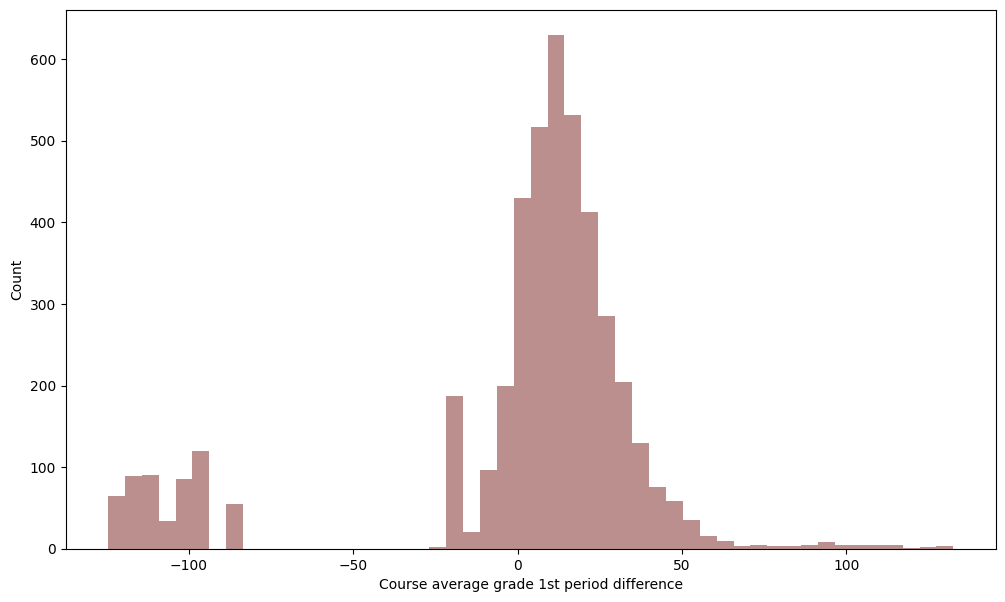

COURSE AVERAGE GRADE 2ND PERIOD DIFFERENCE


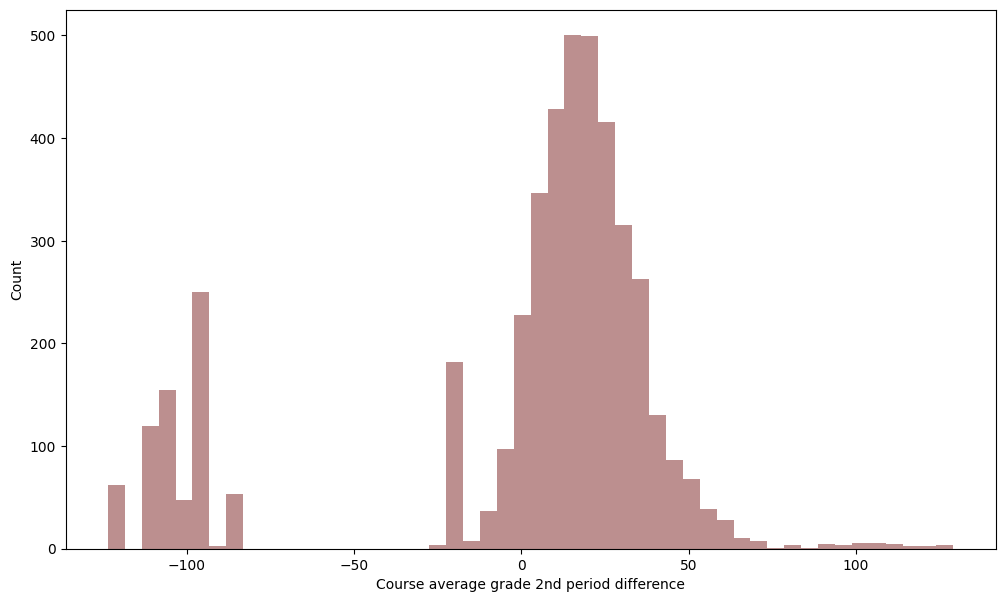

In [55]:
# Check the distribution of features created
for col in data.columns[-5:-2]:
    print(col.upper())
    plot_histogram(data, col)

# <font color='darkorange'> Data Preparation <a class="anchor" id="3"></a>

## One-Hot Encoding <a class="anchor" id="3.1"></a>

In [56]:
data

,Marital status,Application mode,Application order,Morning shift participation,Previous qualification,Previous qualification score,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Course application mode entry score difference,Course average grade 1st period difference,Course average grade 2nd period difference,Technological course,Course area
Userid,,,,,,,,,,,,,,,,,,,,,
699,True,0.0,1.0,True,12.0,140.0,True,12.0,6.0,False,...,11.0,6.0,117.142857,0.0,70.0,6.638542,22.233160,22.374880,True,"Agriculture, forestry and fisheries"
456,False,0.0,1.0,False,12.0,130.0,True,NaN,NaN,True,...,15.0,2.0,110.000000,1.0,55.0,-9.080992,1.810133,3.822871,False,Social services
647,True,1.0,1.0,True,12.0,135.0,True,4.0,12.0,True,...,15.0,1.0,100.000000,0.0,67.0,-3.959358,2.143466,-6.177129,False,Social services
383,True,1.0,1.0,True,12.0,135.0,True,6.0,6.0,True,...,12.0,3.0,103.333333,0.0,93.0,-3.959358,-6.523201,-2.843795,False,Social services
1217,True,2.0,4.0,True,12.0,124.0,True,9.0,9.0,True,...,11.0,NaN,120.000000,0.0,43.0,-5.860550,10.143466,13.822871,False,Social services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,True,0.0,1.0,True,12.0,130.0,True,9.0,6.0,False,...,14.0,7.0,121.500000,0.0,44.0,-11.291489,20.656294,23.840012,False,Health
2761,True,0.0,1.0,True,17.0,150.0,True,15.0,6.0,True,...,10.0,NaN,133.062500,0.0,76.0,0.243258,5.818307,9.515718,False,Health
4410,False,0.0,1.0,False,12.0,140.0,True,4.0,4.0,True,...,6.0,5.0,143.333333,0.0,34.0,-5.195787,49.001552,48.279857,False,Business sciences


In [57]:
data = one_hot_encoding(data)[0]

In [58]:
data

,Course area_Art,Course area_Business sciences,Course area_Engineering and related techniques,Course area_Health,Course area_Information and journalism,Course area_Personal services,Course area_Social services,Course area_Teacher training/trainers and education sciences,Course area_Veterinary sciences,Marital status,...,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Course application mode entry score difference,Course average grade 1st period difference,Course average grade 2nd period difference,Technological course
Userid,,,,,,,,,,,,,,,,,,,,,
699,False,False,False,False,False,False,False,False,False,True,...,6.0,11.0,6.0,117.142857,0.0,70.0,6.638542,22.23316,22.37488,True
456,False,False,False,False,False,False,True,False,False,False,...,6.0,15.0,2.0,110.0,1.0,55.0,-9.080992,1.810133,3.822871,False
647,False,False,False,False,False,False,True,False,False,True,...,6.0,15.0,1.0,100.0,0.0,67.0,-3.959358,2.143466,-6.177129,False
383,False,False,False,False,False,False,True,False,False,True,...,6.0,12.0,3.0,103.333333,0.0,93.0,-3.959358,-6.523201,-2.843795,False
1217,False,False,False,False,False,False,True,False,False,True,...,6.0,11.0,NaN,120.0,0.0,43.0,-5.86055,10.143466,13.822871,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,False,False,False,True,False,False,False,False,False,True,...,8.0,14.0,7.0,121.5,0.0,44.0,-11.291489,20.656294,23.840012,False
2761,False,False,False,True,False,False,False,False,False,True,...,8.0,10.0,NaN,133.0625,0.0,76.0,0.243258,5.818307,9.515718,False
4410,False,True,False,False,False,False,False,False,False,False,...,5.0,6.0,5.0,143.333333,0.0,34.0,-5.195787,49.001552,48.279857,False


# <font color='darkorange'> Export <a class="anchor" id="4"></a>

In [54]:
data.to_csv('data\\data.csv', index='Used')

 [Back to TOC](#toc)